# Redes de bienes

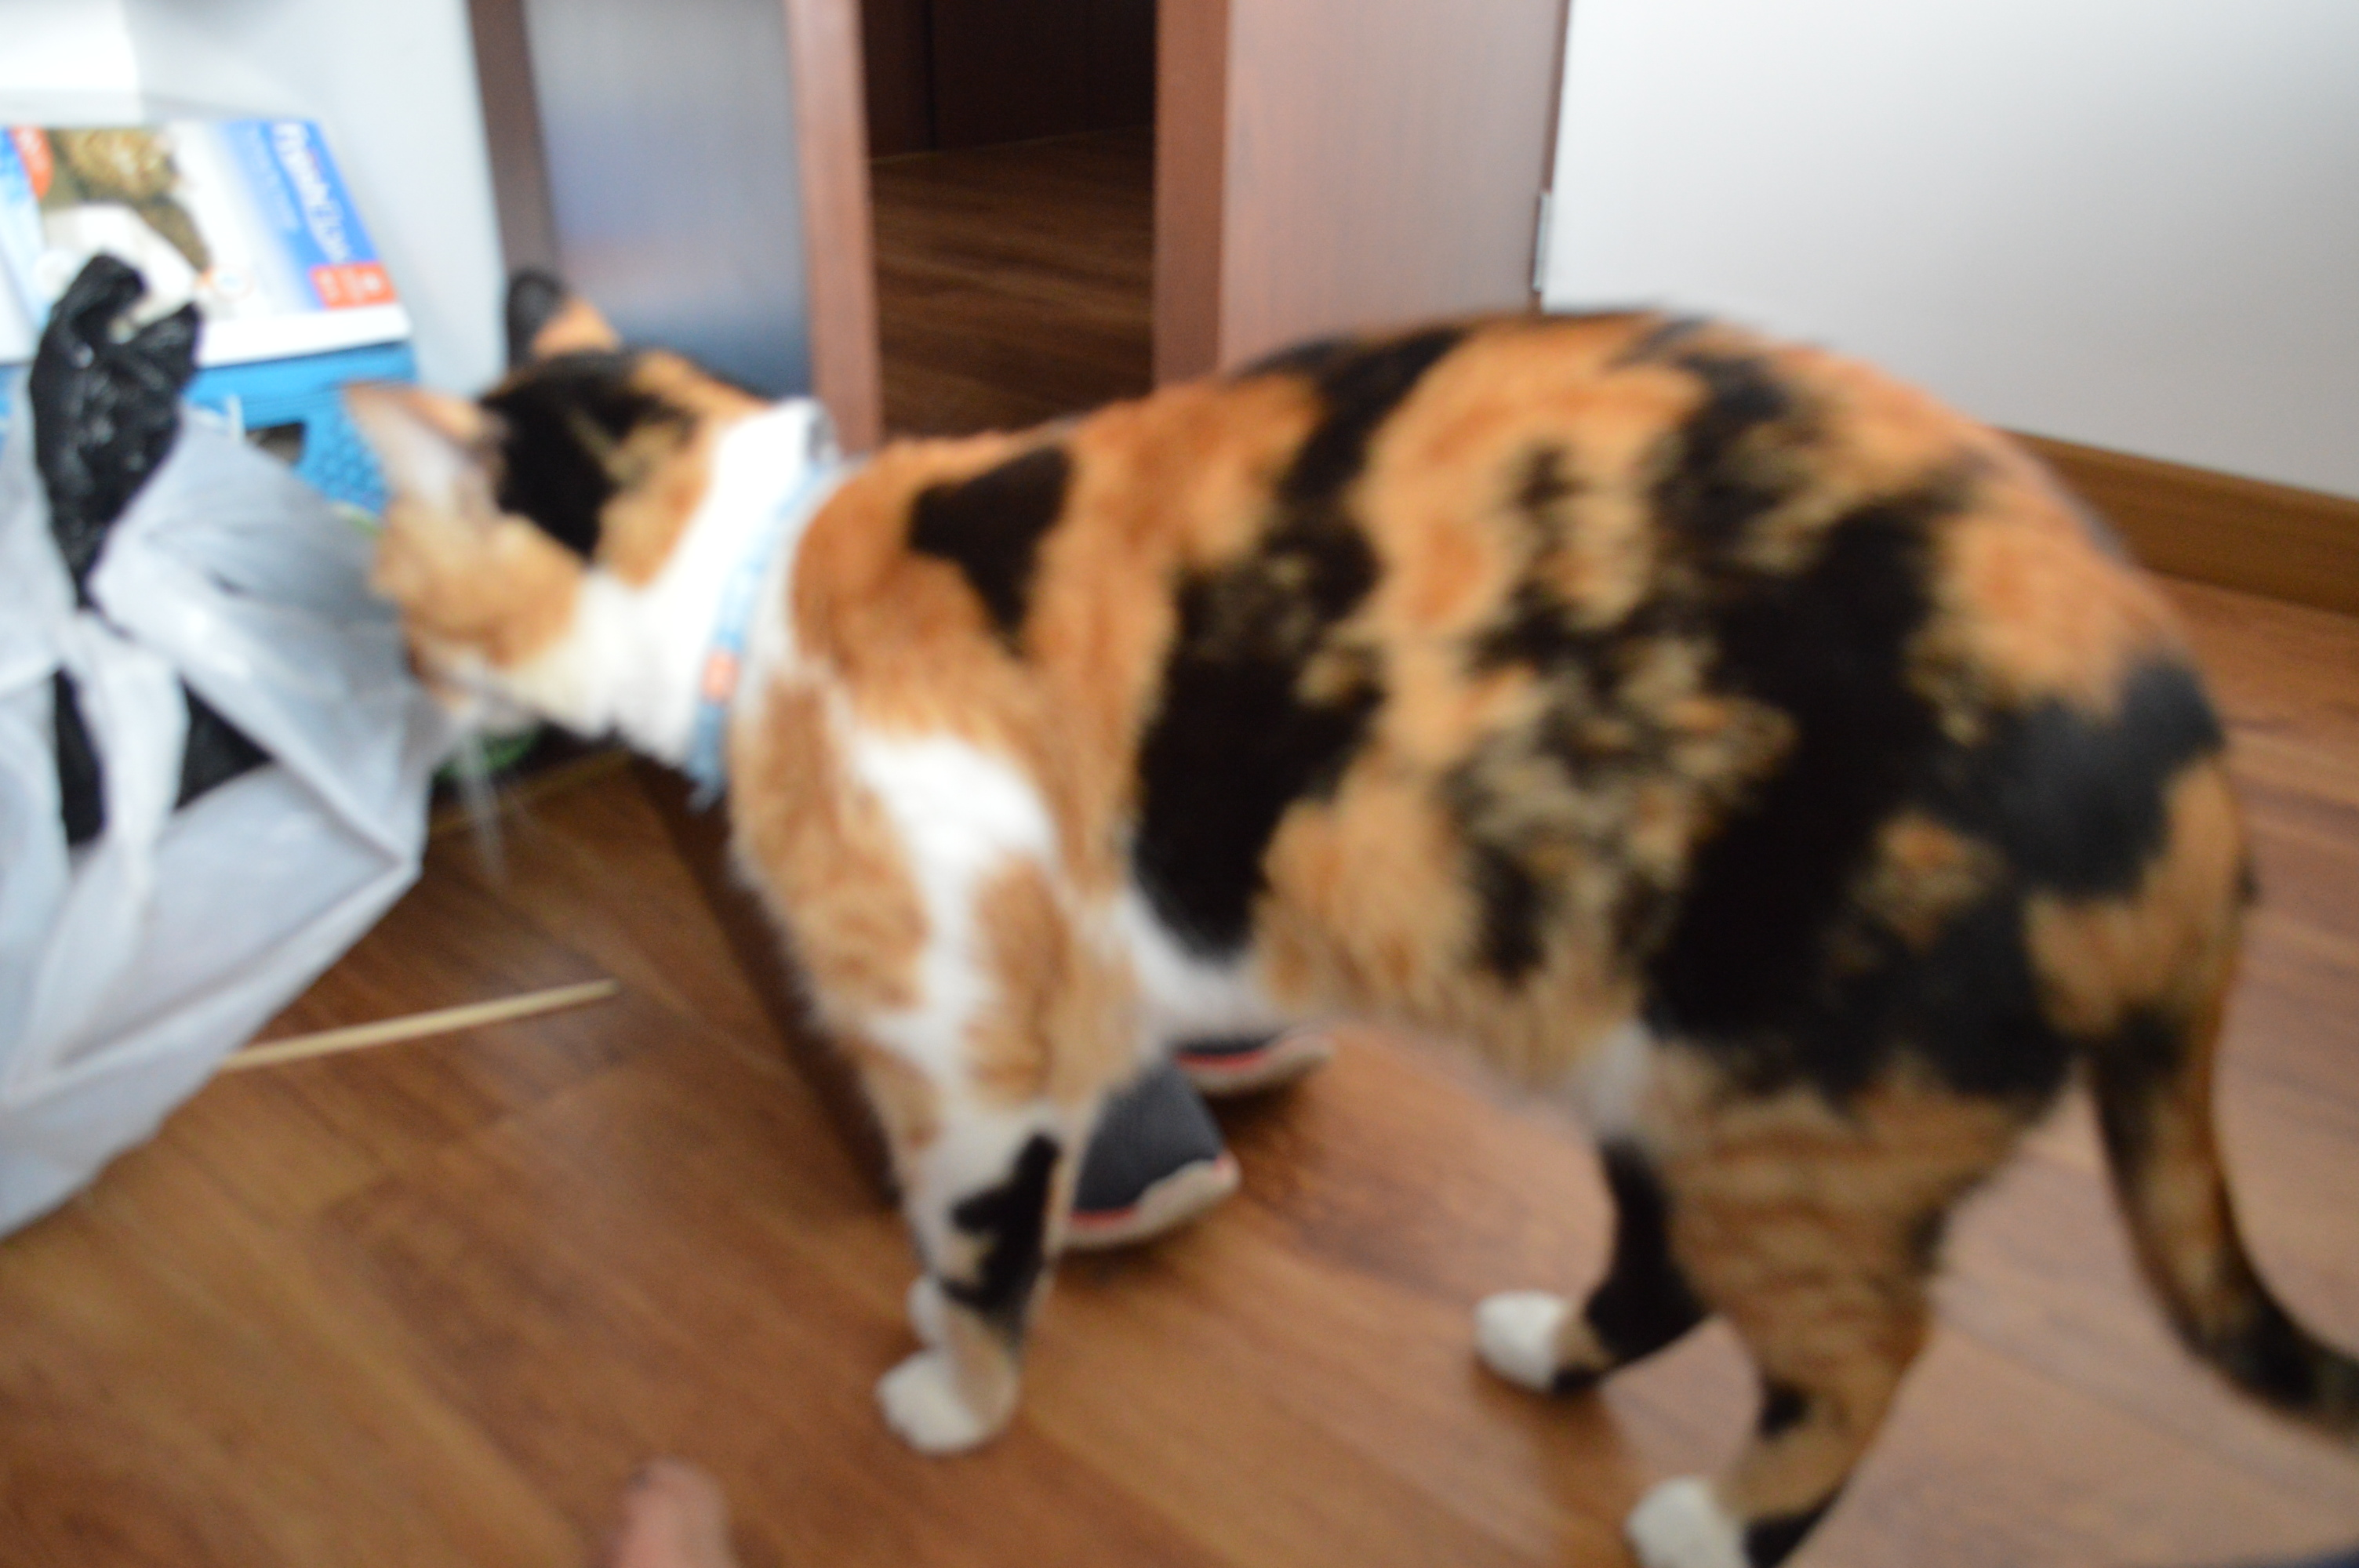

Para el mes de abril de 2020 se grado promedio, grado no dirigido, grado dirigido in, out y fortaleza nodal, y sus respectivas entropías 

In [1]:
# Importacion de las librerias necesarias 
#Vamos a importar las librerías que serán necesarias
import pandas as pd
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt
import operator
import itertools
import datetime

from scipy.optimize import curve_fit


In [2]:
df_totales=  pd.read_table('AbrilTotales.csv',sep=',',encoding='utf-8') #leer la matriz
#df_matriz_t=  pd.read_table('2020abril_adjency.csv',sep=',',encoding='utf-8')

In [3]:
df_totales

Unnamed: 0          Reporter        Partner  Trade Value (US$)  \
0               0            Uganda          Spain          1356732.0   
1               1            Uganda  Rep. of Korea          3047408.0   
2               2            Uganda          India         54821300.0   
3               3            Uganda          Italy          4878253.0   
4               4            Uganda         Greece           215985.0   
...           ...               ...            ...                ...   
17938       17938     New Caledonia       Malaysia                NaN   
17939       17939           Vanuatu       Malaysia                NaN   
17940       17940  Papua New Guinea       Malaysia                NaN   
17941       17941          Kiribati       Malaysia                NaN   
17942       17942             China       Malaysia                NaN   

              expor    TradeValue        Weight      Type  
0      5.320466e+06  3.338599e+06  3.338599e+06  Directed  
1               NaN  3.047408e+06  3.047408e+06  Directed  
2      2.734912e+07  4.108521e+07  4.108521e+07  Directed  
3      1.635536e+06  3.256894e+06  3.256894e+06  Directed  
4      6.851840e+05  4.505845e+05  4.505845e+05  Directed  
...             ...           ...           ...       ...  
17938  7.906177e+06  7.906177e+06  7.906177e+06  Directed  
17939  1.480420e+05  1.480420e+05  1.480420e+05  Directed  
17940  1.464429e+07  1.464429e+07  1.464429e+07  Directed  
17941  1.380090e+05  1.380090e+05  1.380090e+05  Directed  
17942  2.772037e+09  2.772037e+09  2.772037e+09  Directed  

[17943 rows x 8 columns]

Vamos a subir los archivos, comenzamos por las comodidades totales

Ahora subiremos los datos de los textiles (HS CODE) Vamos a subir los datos de textiles (toda la sección de textiles en HS CODE) https://www.foreign-trade.com/reference/hscode.htm CAPÍTULO 50-63

Vamos a subir los datos de  (toda la sección de textiles en HS CODE) https://www.foreign-trade.com/reference/hscode.htm CAPÍTULO 50-63

In [4]:
df_textiles= pd.read_table('2020abriltextiles.csv',sep=',',encoding='utf-8') #leer la matriz

In [5]:
df_textiles

Unnamed: 0 Reporter Partner  Trade Value (US$)     expor  TradeValue  \
0                0    EU-28   Niger              128.0       NaN       128.0   
1                1    EU-28   Niger              538.0       NaN       538.0   
2                2    EU-28   Niger              251.0       NaN       251.0   
3                3    EU-28   Niger              452.0       NaN       452.0   
4                4    EU-28    Fiji             3942.0       NaN      3942.0   
...            ...      ...     ...                ...       ...         ...   
719921      719921    World  Serbia                NaN  182783.0    182783.0   
719922      719922    World  Serbia                NaN      75.0        75.0   
719923      719923    World  Serbia                NaN   52085.0     52085.0   
719924      719924    World  Serbia                NaN     500.0       500.0   
719925      719925    World  Serbia                NaN    1361.0      1361.0   

          Weight      Type  
0          128.0  Directed  
1          538.0  Directed  
2          251.0  Directed  
3          452.0  Directed  
4         3942.0  Directed  
...          ...       ...  
719921  182783.0  Directed  
719922      75.0  Directed  
719923   52085.0  Directed  
719924     500.0  Directed  
719925    1361.0  Directed  

[719926 rows x 8 columns]

Vamos a hacer funciones para quitar a "World", pensé quitar EU-28 Peeeeero la vdd si aportan resto
entonces mejor quito solo world

Ahora, subiremos lo de materias primas, peor, qué vamos a subir acá?
 Animal & Animal Products
 Vegetable Products
 Mineral Products 

In [6]:
df_materias= pd.read_table('2020abrilmateria.csv',sep=',',encoding='utf-8') #leer la matriz

In [7]:
df_materias

Unnamed: 0 Reporter Partner  Trade Value (US$)       expor  \
0                0    EU-28  Rwanda            42118.0         NaN   
1                1    EU-28  Rwanda           112740.0         NaN   
2                2    EU-28  Rwanda            62825.0         NaN   
3                3    EU-28  Rwanda              859.0         NaN   
4                4    EU-28  Rwanda             1521.0         NaN   
...            ...      ...     ...                ...         ...   
425882      425882    World  Serbia                NaN     43205.0   
425883      425883    World  Serbia                NaN   4945424.0   
425884      425884    World  Serbia                NaN  30726012.0   
425885      425885    World  Serbia                NaN   3367305.0   
425886      425886    World  Serbia                NaN     33286.0   

        TradeValue      Weight      Type  
0          42118.0     42118.0  Directed  
1         112740.0    112740.0  Directed  
2          62825.0     62825.0  Directed  
3            859.0       859.0  Directed  
4           1521.0      1521.0  Directed  
...            ...         ...       ...  
425882     43205.0     43205.0  Directed  
425883   4945424.0   4945424.0  Directed  
425884  30726012.0  30726012.0  Directed  
425885   3367305.0   3367305.0  Directed  
425886     33286.0     33286.0  Directed  

[425887 rows x 8 columns]

Por último, subiremos los vehículos, que serán entonces 87	VEHICLES; OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK
, AND PARTS AND ACCESSORIES THEREOF
https://www.foreign-trade.com/reference/hscode.htm?cat=14 
Poner las citaciones
de esta página web saqué llas bases para hacer las diferencias en las redes

In [7]:
df_vehiculo= pd.read_table('2020abrilvehiculos.csv',sep=',',encoding='utf-8') #leer la matriz

In [9]:
df_vehiculo

Unnamed: 0           Reporter               Partner  Trade Value (US$)  \
0               0              EU-28            Cabo Verde              240.0   
1               1              EU-28            Bangladesh             1500.0   
2               2              EU-28                Mexico             5864.0   
3               3              EU-28                Mexico              102.0   
4               4              EU-28  United Arab Emirates              250.0   
...           ...                ...                   ...                ...   
23144       23144  TFYR of Macedonia                Serbia                NaN   
23145       23145  TFYR of Macedonia                Serbia                NaN   
23146       23146              Egypt                Serbia                NaN   
23147       23147              Egypt                Serbia                NaN   
23148       23148              World                Serbia                NaN   

           expor  TradeValue     Weight      Type  
0            NaN       240.0      240.0  Directed  
1            NaN      1500.0     1500.0  Directed  
2            NaN      5864.0     5864.0  Directed  
3            NaN       102.0      102.0  Directed  
4            NaN       250.0      250.0  Directed  
...          ...         ...        ...       ...  
23144   157851.0    157851.0   157851.0  Directed  
23145    46235.0     46235.0    46235.0  Directed  
23146     2790.0      2790.0     2790.0  Directed  
23147   124131.0    124131.0   124131.0  Directed  
23148  3733412.0   3733412.0  3733412.0  Directed  

[23149 rows x 8 columns]

Buenooo, ahora sí, vamos a quitar world como partner y reporter, porque bueno para qué lo dejamos ahí, 

In [8]:
#Quitar world del partner
def quitar_worldp(df):
   dataset= df[df['Partner']=='World'].index
   return df.drop(dataset)
#Quitar world del reporter
def quitar_worldr(df):
   dataset= df[df['Reporter']=='World'].index
   return df.drop(dataset)

Pondremos estoo, lo probaremos en textiles

In [9]:
df_textiles=quitar_worldp(df_textiles)
df_textiles=quitar_worldr(df_textiles)

In [12]:
df_textiles

Unnamed: 0           Reporter Partner  Trade Value (US$)    expor  \
0                0              EU-28   Niger              128.0      NaN   
1                1              EU-28   Niger              538.0      NaN   
2                2              EU-28   Niger              251.0      NaN   
3                3              EU-28   Niger              452.0      NaN   
4                4              EU-28    Fiji             3942.0      NaN   
...            ...                ...     ...                ...      ...   
719911      719911  TFYR of Macedonia  Serbia                NaN   1682.0   
719912      719912     United Kingdom  Serbia                NaN  14045.0   
719913      719913     United Kingdom  Serbia                NaN  13987.0   
719914      719914     United Kingdom  Serbia                NaN  13274.0   
719915      719915     United Kingdom  Serbia                NaN  57355.0   

        TradeValue   Weight      Type  
0            128.0    128.0  Directed  
1            538.0    538.0  Directed  
2            251.0    251.0  Directed  
3            452.0    452.0  Directed  
4           3942.0   3942.0  Directed  
...            ...      ...       ...  
719911      1682.0   1682.0  Directed  
719912     14045.0  14045.0  Directed  
719913     13987.0  13987.0  Directed  
719914     13274.0  13274.0  Directed  
719915     57355.0  57355.0  Directed  

[714856 rows x 8 columns]

Se perdieron casi 5000 filas, para los textiles, pero es que siento que puede falsear etsos dtaos entonces pues mejor los sacamos
Haré lo mismo para comodidades totales ya se lo había quitado, pero cuando creé los archivos de CSV de estas cosas lo olvidé, entonces pues soo e suna función. Cuando haga la variación temporal, tendré que quitar WORLD, UE-28 y eso porque me falsea un tris los datos, de ahí solo quiero densidad y reciprocdad y eso, que nos muestran las relaciones entre países, entonces pues esa vaina no me sirve , peroooooo,para este, siento que SÍ, porque nos da cuenta del flujo de dinero

Bueno ahora haremos el de vehículos

In [10]:
df_vehiculo=quitar_worldp(df_vehiculo)
df_vehiculo=quitar_worldr(df_vehiculo)

In [14]:
df_vehiculo

Unnamed: 0           Reporter               Partner  Trade Value (US$)  \
0               0              EU-28            Cabo Verde              240.0   
1               1              EU-28            Bangladesh             1500.0   
2               2              EU-28                Mexico             5864.0   
3               3              EU-28                Mexico              102.0   
4               4              EU-28  United Arab Emirates              250.0   
...           ...                ...                   ...                ...   
23143       23143  TFYR of Macedonia                Serbia                NaN   
23144       23144  TFYR of Macedonia                Serbia                NaN   
23145       23145  TFYR of Macedonia                Serbia                NaN   
23146       23146              Egypt                Serbia                NaN   
23147       23147              Egypt                Serbia                NaN   

          expor  TradeValue    Weight      Type  
0           NaN       240.0     240.0  Directed  
1           NaN      1500.0    1500.0  Directed  
2           NaN      5864.0    5864.0  Directed  
3           NaN       102.0     102.0  Directed  
4           NaN       250.0     250.0  Directed  
...         ...         ...       ...       ...  
23143  497363.0    497363.0  497363.0  Directed  
23144  157851.0    157851.0  157851.0  Directed  
23145   46235.0     46235.0   46235.0  Directed  
23146    2790.0      2790.0    2790.0  Directed  
23147  124131.0    124131.0  124131.0  Directed  

[22620 rows x 8 columns]

Bueno, se perdieron un poco más de 700 filas, es infromación que decidimos ignorar para estudiar el conercio de etsos bienes entre países

Por último pero no menos importante, haremos el mismo procedimiento para la materia prima, ya recordando pues como la había definido
Esos códigos HS estaban super raros esas definiciones con una mano de excepciones sacadas del jopo
no manejé excepciones porque 1: no tengo tiempo, 2: no las entendí juaz


In [11]:
df_materias=quitar_worldp(df_materias)
df_materias=quitar_worldr(df_materias)
df_materias

Unnamed: 0    Reporter Partner  Trade Value (US$)      expor  \
0                0       EU-28  Rwanda            42118.0        NaN   
1                1       EU-28  Rwanda           112740.0        NaN   
2                2       EU-28  Rwanda            62825.0        NaN   
3                3       EU-28  Rwanda              859.0        NaN   
4                4       EU-28  Rwanda             1521.0        NaN   
...            ...         ...     ...                ...        ...   
425868      425868      Israel  Serbia                NaN   602755.0   
425869      425869      Israel  Serbia                NaN   214818.0   
425870      425870  Montenegro  Serbia                NaN   125208.0   
425871      425871  Montenegro  Serbia                NaN  1679817.0   
425872      425872  Montenegro  Serbia                NaN   275796.0   

        TradeValue     Weight      Type  
0          42118.0    42118.0  Directed  
1         112740.0   112740.0  Directed  
2          62825.0    62825.0  Directed  
3            859.0      859.0  Directed  
4           1521.0     1521.0  Directed  
...            ...        ...       ...  
425868    602755.0   602755.0  Directed  
425869    214818.0   214818.0  Directed  
425870    125208.0   125208.0  Directed  
425871   1679817.0  1679817.0  Directed  
425872    275796.0   275796.0  Directed  

[422028 rows x 8 columns]

Bueeeno, ya con eso quitado proederé a hacer los grafos vdd

# # Grafos no dirigidos

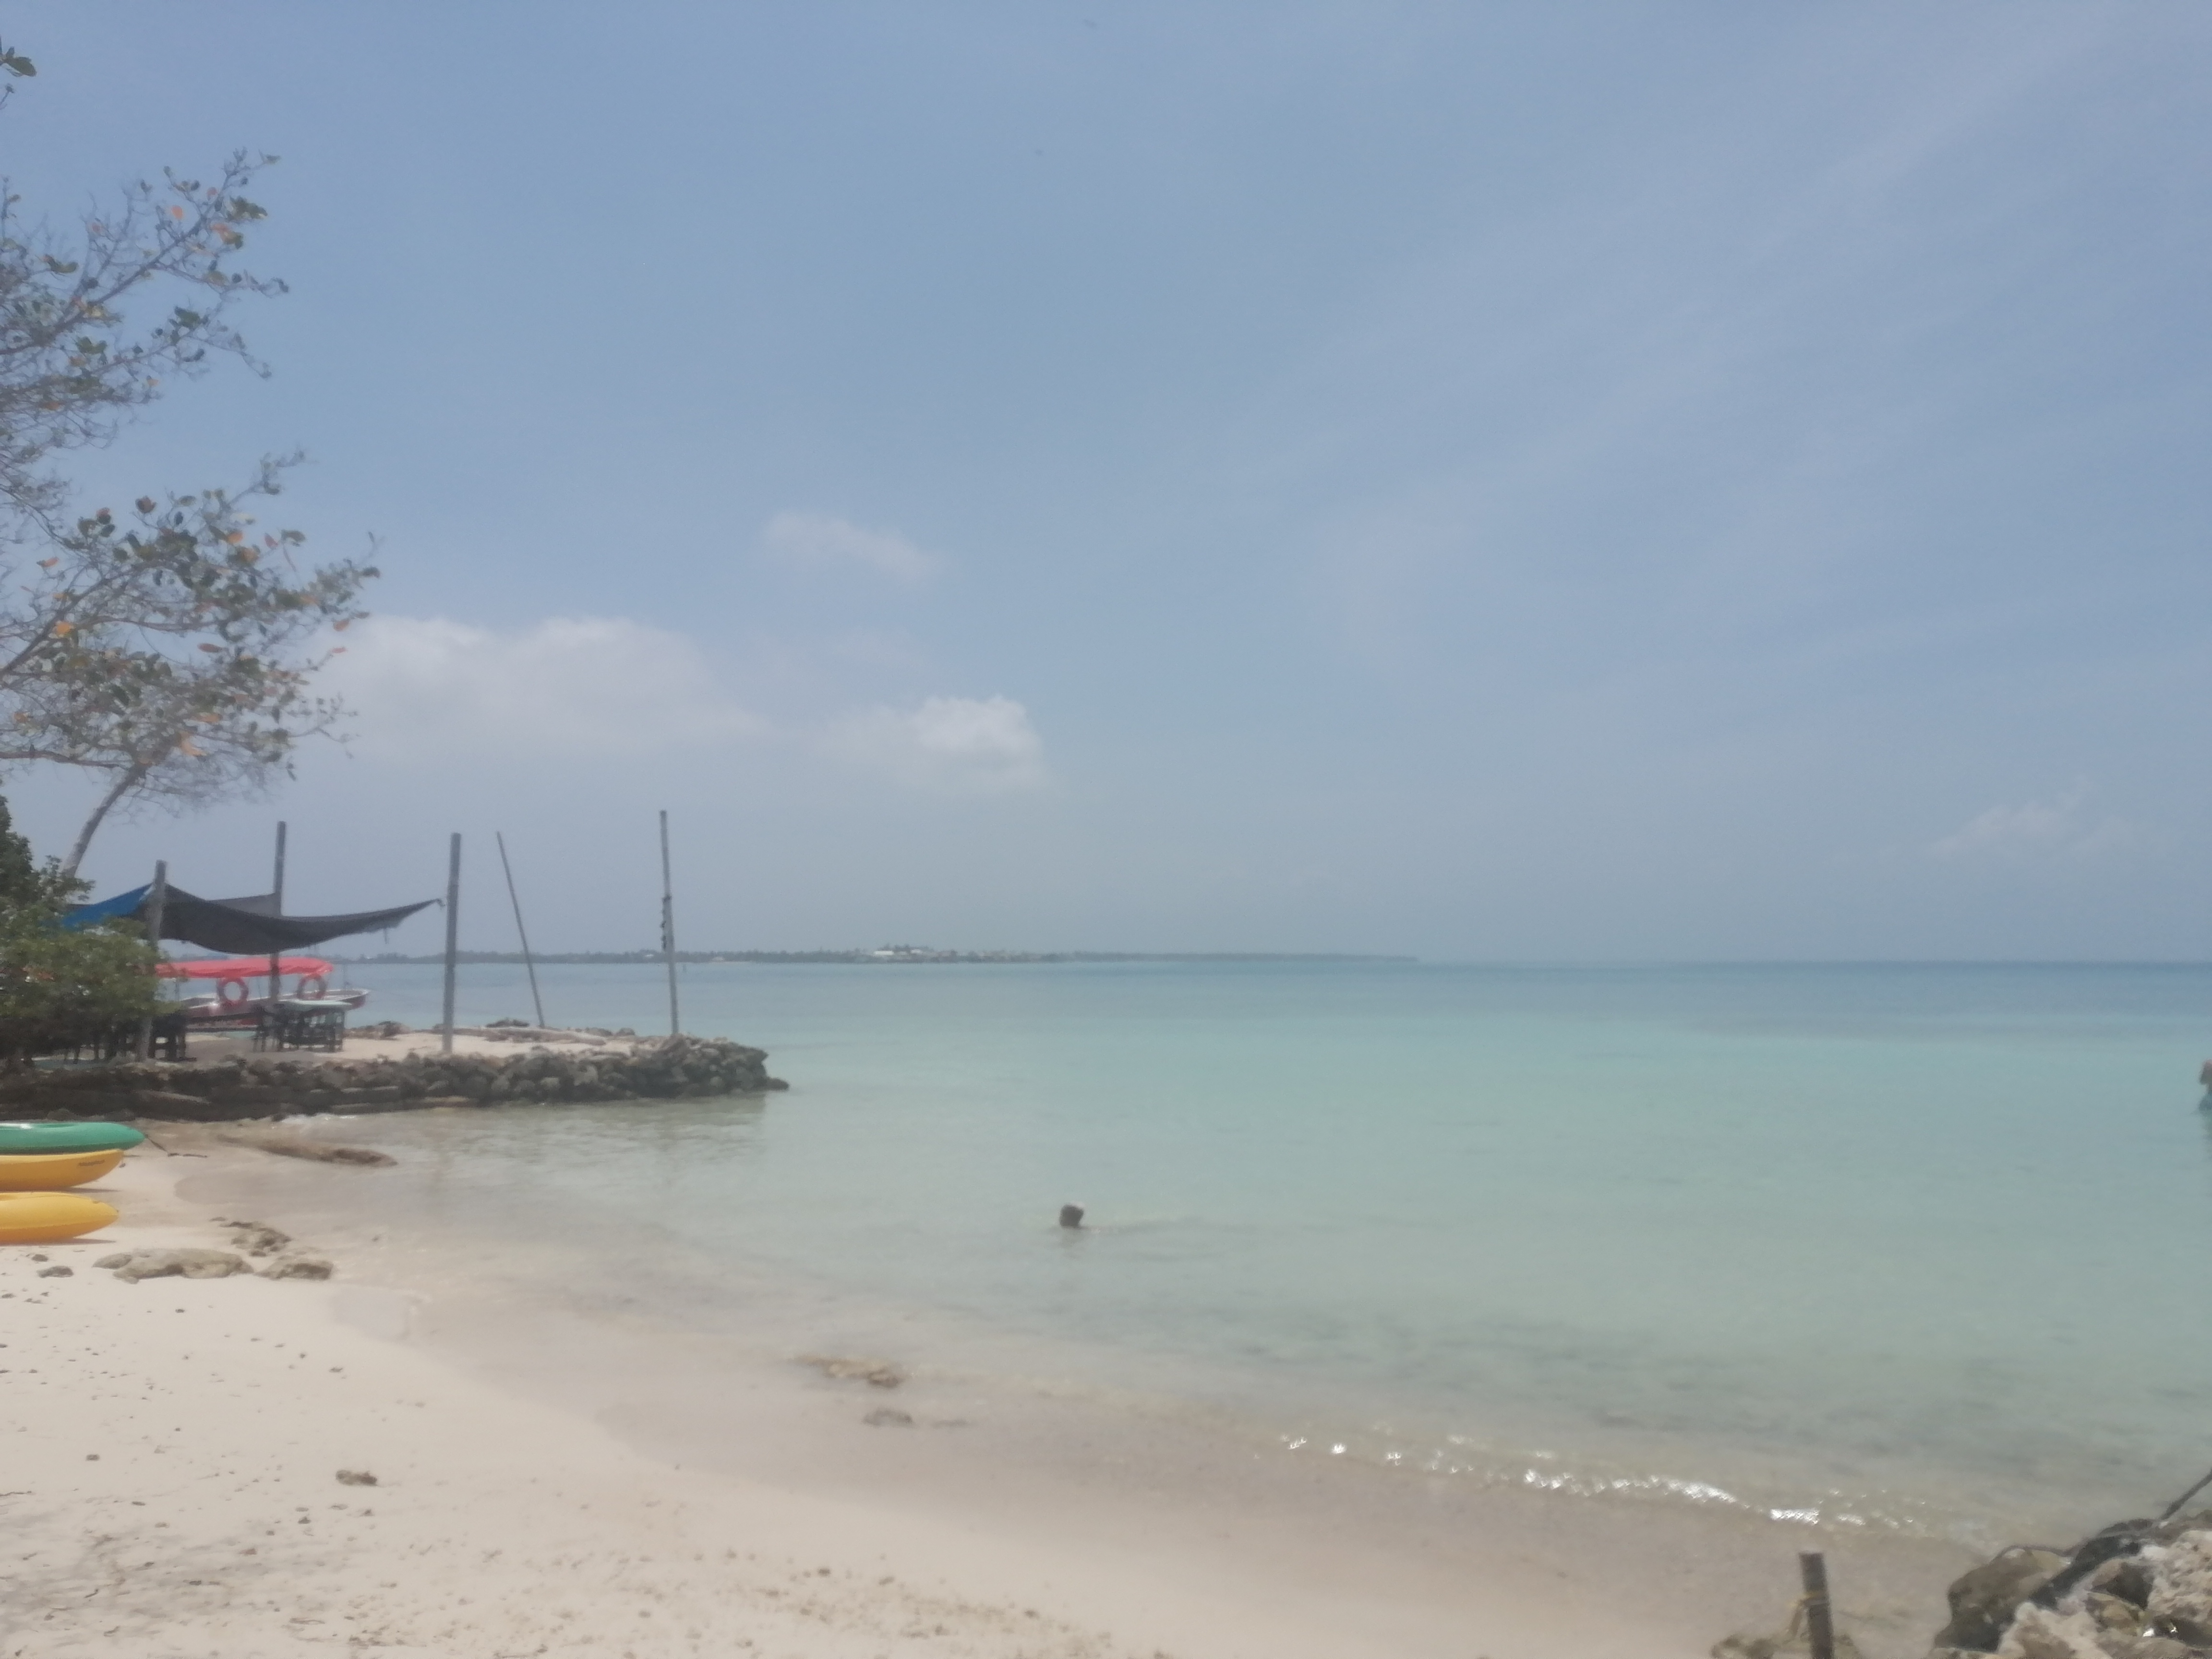

Bueno acá haremos los grafos no dirigidos para esta vuelta, para los cuatro

#### Grafo comodidades total


In [12]:
#Grafo dirigido y pesado
Grafo_dirigido_totales=nx.from_pandas_edgelist(df_totales,'Reporter','Partner','TradeValue',nx.DiGraph())
#Grafo no dirigido y pesado
Grafo_no_totales=nx.from_pandas_edgelist(df_totales,'Reporter','Partner','TradeValue',nx.Graph())



#####  Vehículos

In [13]:
#Grafo dirigido y pesado
Grafo_dirigido_vehiculo=nx.from_pandas_edgelist(df_vehiculo,'Reporter','Partner','TradeValue',nx.DiGraph())
#Grafo no dirigido y pesado
Grafo_no_vehiculo=nx.from_pandas_edgelist(df_vehiculo,'Reporter','Partner','TradeValue',nx.Graph())



##### Materias primas

In [14]:
#Grafo dirigido y pesado
Grafo_dirigido_materias=nx.from_pandas_edgelist(df_materias,'Reporter','Partner','TradeValue',nx.DiGraph())
#Grafo no dirigido y pesado
Grafo_no_materias=nx.from_pandas_edgelist(df_materias,'Reporter','Partner','TradeValue',nx.Graph())



##### Textiles

In [15]:
#Grafo dirigido y pesado
Grafo_dirigido_textiles=nx.from_pandas_edgelist(df_textiles,'Reporter','Partner','TradeValue',nx.DiGraph())
#Grafo no dirigido y pesado
Grafo_no_textiles=nx.from_pandas_edgelist(df_textiles,'Reporter','Partner','TradeValue',nx.Graph())


Bueeenooo, ya tenemos esta vaina hecha, ahora, lo que haremos es definir algunas funciones que nos sirven 

### Funciones que pueden servir para las distribuciones que debería estar haciendo juazz

In [16]:

# Se define la funcion de distribucion del grado
def degree_dist(G):
    degree = dict(G.degree())
    values_x = sorted(set(degree.values()))
    dist_y = [list(degree.values()).count(x) for x in values_x]
    return values_x, dist_y

def in_out_degree(G):
    in_degree = dict(G.in_degree())
    out_degree = dict(G.out_degree())
    in_x = sorted(set(in_degree.values()))
    out_x = sorted(set(out_degree.values()))
    in_y = [list(in_degree.values()).count(x) for x in in_x]
    out_y = [list(out_degree.values()).count(x) for x in out_x]
    return in_x, in_y, out_x, out_y

def mean_degree(G):
    degree = dict(G.degree())
    array = []
    for i in degree.values():
        array.append(i)
    array = np.asarray(array)
    return np.sum(array)/len(array)

# para fuerza in in_out = 0, para fuerza out in_out = 1, para fuerza en general in_out = 1, creeeooo
def nodal_strength(array, in_out):
    my_array = []
    for i in array:
        count = 0
        for j in array:
            if j[in_out] == i[in_out]:
                for k in j[2].values():
                    count = count +k
        my_array.append((count, i[in_out]))
    my_array = list(set(my_array))
    my_array.sort(reverse = True) 
    return my_array

# Funcion para completar las matrices de adyacencia y poder crear la red.
def what_index_columns(matrix):
    index = []
    columns = []
    for i in matrix.index:
        if i not in matrix.columns:
            columns.append(i)
    for i in matrix.columns:
        if i not in matrix.index:
            index.append(i)
    return index, columns

# Agrega las filas y columnas faltantes     
def index_columns(matrix, index, columns):
    for i in index:
        matrix.loc[i] = 0
    for j in columns:
        matrix[j] = 0
        
# Se calcula la densidad de una red dirigida, que es lo que haré
def density(G):
    dn = G.number_of_edges()/(len(G)*(len(G)-1))
    return dn


### Otras funciones que sirven

In [17]:
# Se define una funcion exponencial para poder ajustar las curvas
def expo(x1, a, b):
    return a*np.exp(-b*x1)

# Se definde la ley de potencias 
def pow_law(x, a, b):
    return a*pow(x, -b)

# Funcion para el R^2
def r_squared(xdata, ydata, popt):
    residuals = ydata - expo(xdata, popt[0], popt[1])
    ss_res = np.sum(residuals**2.0)
    ss_tot = np.sum((ydata-np.mean(ydata))**2.0)
    r = 1 - (ss_res / ss_tot)
    return r

# Se define la funcion que cuenta cada elemento en un areglo
def count(array):
    y_dist = np.asarray([list(array).count(x) for x in np.unique(array)])
    x_dist = np.asarray([x for x in np.unique(array)])
    return x_dist, y_dist

# Cambia los datos de hora a tipo datatime 
def to_time(clmn):
    array = []
    for i in clmn:
        array.append(datetime.datetime.strptime(i, '%H:%M:%S').time())
    return array

# Funcion en la que se aplica el metodo de newman
def newman(array):
    my_array = []
    for i in range(len(array)):
        P = sum(array[i:])
        my_array.append(P)
    return my_array

# Calculo de la entropia de cada funcion
def entropy(array):
    s = 0
    for p_i in array:
        s = s+p_i*np.log(p_i)
    return -s




# Análisis de las redes, para el grafo no dirigido

## Grado

### Comodidades Totales

In [18]:


xx_totales, yx_totales = degree_dist(Grafo_no_totales)
xx_totales = np.asarray(xx_totales)
yx_totales = np.asarray(yx_totales)
popt1tot, pcov1tot = curve_fit(expo, xdata = xx_totales, ydata = yx_totales)
xspace = np.linspace(0,300, num = 300)



<ipython-input-17-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


In [19]:
y_arrayx_totales = np.asarray(yx_totales)/sum(yx_totales)
popt2totales, pcov2totales = curve_fit(expo, xdata = xx_totales, ydata = y_arrayx_totales)
y_newmanx_totales = newman(y_arrayx_totales)

popt3_totales, pocv3_totales = curve_fit(expo, xdata = xx_totales, ydata = y_newmanx_totales)


<ipython-input-17-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)
<ipython-input-17-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x1)


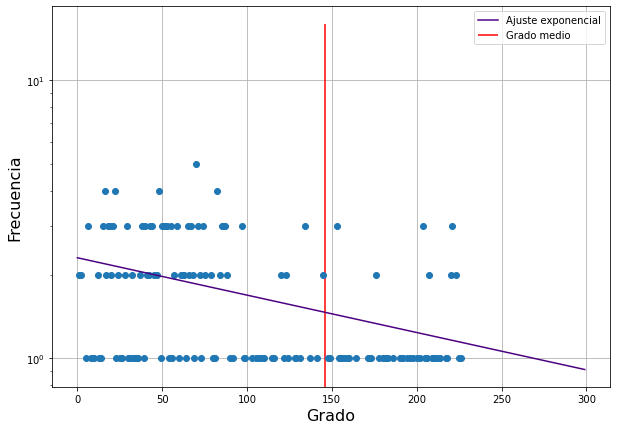

In [22]:
plt.figure(figsize = (10,7))
plt.semilogy(xx_totales, yx_totales, 'o')
plt.semilogy(expo(xspace,popt1tot[0], popt1tot[1]), color = 'indigo', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_totales), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend()
plt.grid()
plt.show()


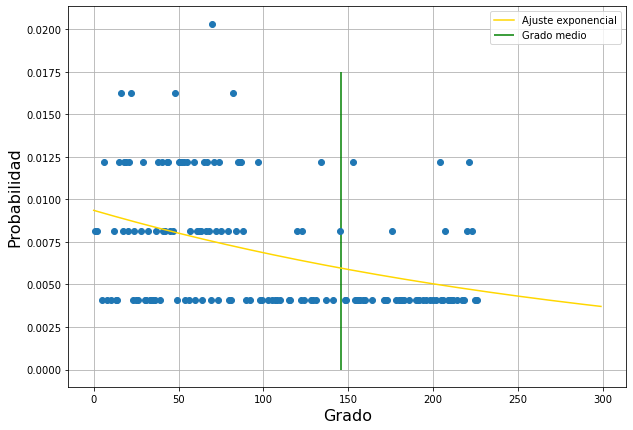

In [24]:
plt.figure(figsize = (10,7))
plt.plot(xx_totales, y_arrayx_totales, 'o')
plt.plot(expo(xspace,popt2totales[0], popt2totales[1]), color = 'gold', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_totales), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
plt.legend()
plt.grid()
plt.show()


#### esto es CDF pero con x scale log

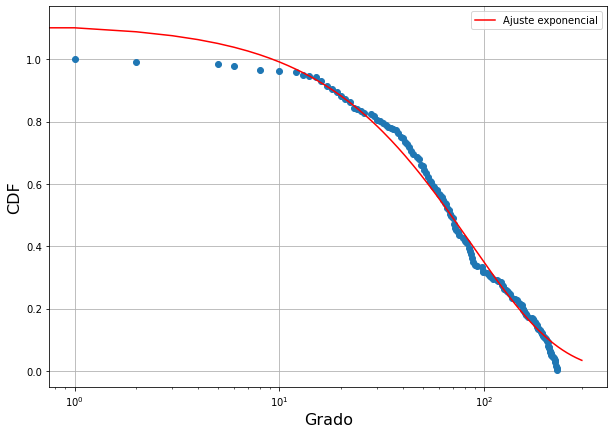

In [29]:
plt.figure(figsize = (10,7))
plt.plot(xx_totales, y_newmanx_totales, 'o')
plt.plot(expo(xspace,popt3_totales[0], popt3_totales[1]), color = 'r', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xscale("log")
plt.xlabel('Grado', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()
plt.show()

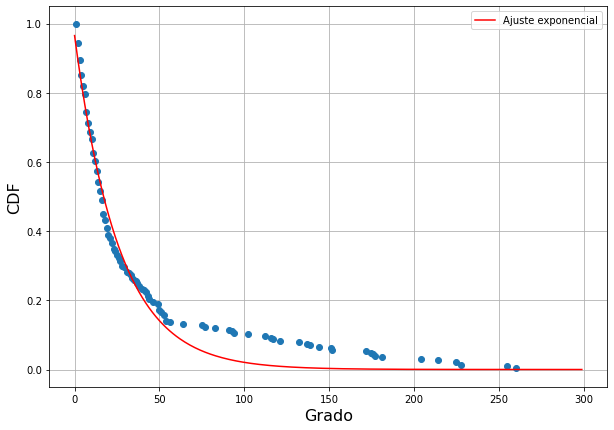

In [120]:
plt.figure(figsize = (10,7))
plt.plot(xx_ve, y_newmanx_ve, 'o')
plt.plot(expo(xspace,popt3ve[0], popt3ve[1]), color = 'r', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()
plt.show()

In [121]:
print(r_squared(xx_ve, yx_ve, popt1ve))
print(r_squared(xx_ve, y_arrayx_ve, popt2ve))
print(r_squared(xx_ve, y_newmanx_ve, popt3ve)) #distribuvion cumulativa


0.7689511089584179
0.7689511090214961
0.9677741753612074


ole estos tienen una distrubución exponencial bacana, o sea el R^2 si da cercano

In [84]:
print(entropy(y_array_ve))
print(entropy(y_newman_ve))



2*Grafo_dirigido_totales.number_of_edges()/len(Grafo_dirigido_totales)


NameError: name 'y_array_ve' is not defined

In [127]:
# Zonas con mayor grado 
degree_dict = dict(Grafo_no_totales.degree())
sorted_d = dict( sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True))
dict_degree = dict(itertools.islice(sorted_d.items(), 10))
dict_degree

{'Germany': 226,
 'United States of America': 225,
 'Poland': 223,
 'Netherlands': 223,
 'Spain': 221,
 'United Kingdom': 221,
 'ASEAN': 221,
 'Canada': 220,
 'Singapore': 220,
 'Czech Rep.': 218}

### Materias primas

Vamos a haer ciertas gráficas, entonces comenzamos con la distribución de grado del grafo dirigido, y vamos a tratar de ajustarlos a una curva exponencial

In [24]:
x, y = degree_dist(Grafo_dirigido_materias)
x = np.asarray(x)
y = np.asarray(y)
popt1, pcov1 = curve_fit(expo, xdata = x, ydata = y)
xspace = np.linspace(0,400, num = 400)


<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


Vamos a hacer la gráfica de freuencia vs grado

f_{4}

<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


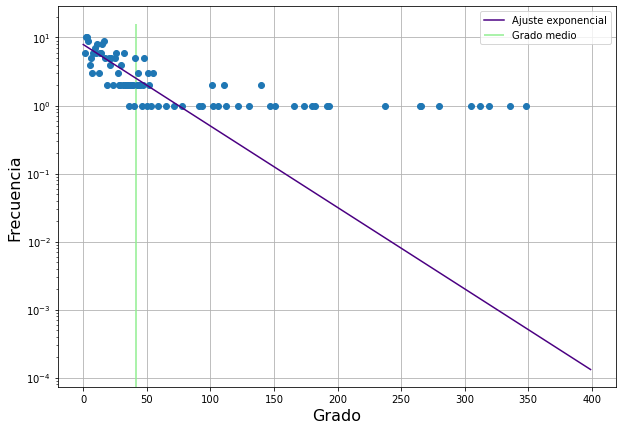

In [94]:
x, y = degree_dist(Grafo_dirigido_materias)
x = np.asarray(x)
y = np.asarray(y)
popt1, pcov1 = curve_fit(expo, xdata = x, ydata = y)
xspace = np.linspace(0,400, num = 400)



plt.figure(figsize = (10,7))
plt.semilogy(x, y, 'o')
plt.semilogy(expo(xspace,popt1[0], popt1[1]), color = 'indigo', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_materias), 0, 16, color = 'lightgreen',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend()
plt.grid()
plt.show()


In [95]:

y_array = np.asarray(y)/sum(y)
popt2, pcov2 = curve_fit(expo, xdata = x, ydata = y_array)
y_newman = newman(y_array)
popt3, pocv3 = curve_fit(expo, xdata = x, ydata = y_newman)




<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)
<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x1)


La distribución de probabilidad

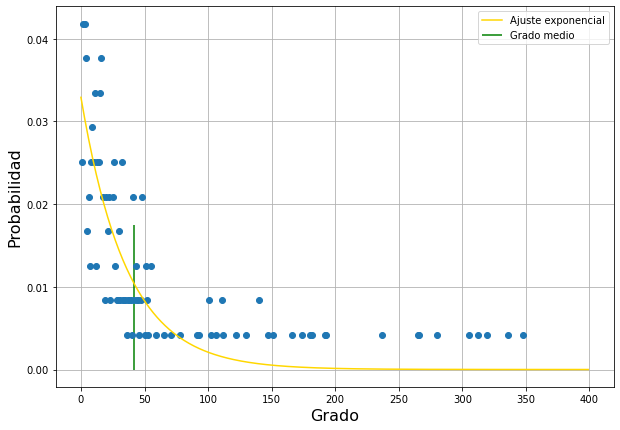

In [29]:
plt.figure(figsize = (10,7))
plt.plot(x, y_array, 'o')
plt.plot(expo(xspace,popt2[0], popt2[1]), color = 'gold', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_materias), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
plt.legend()
plt.grid()
plt.show()


In [33]:
entropy(y_array)

4.108980074962003

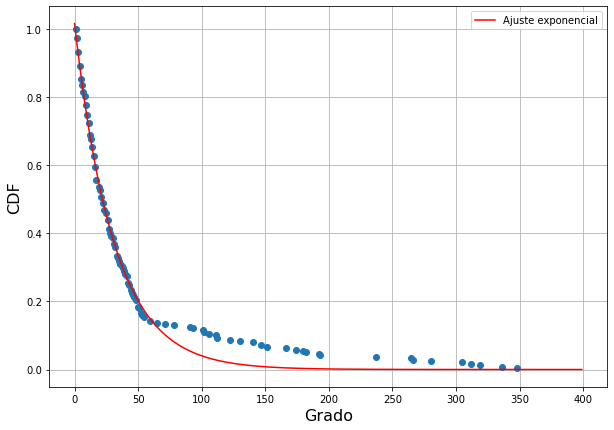

In [37]:
plt.figure(figsize = (10,7))
plt.plot(x, y_newman, 'o')
plt.plot(expo(xspace,popt3[0], popt3[1]), color = 'r', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [90]:


# Calculo del R^2 para ambos casos 
print(r_squared(x, y, popt1))
print(r_squared(x, y_array, popt2))
print(r_squared(x, y_newman, popt3)) #distribuvion cumulativa





0.6381090057316244
-22528.303028093756
0.9392646705310638


Bueno, se comporta como una distribución exponencial

In [52]:


print(entropy(y_array))
print(entropy(y_newman))



4.108980074962003
20.33572206724421


Por qué la entropía de grad difiere tantísimo de la distribuión aumulativa de grado?

In [59]:
#medidas de red
print(2*density(Grafo_dirigido_materias))


#nx.diameter(Grafo_dirigido_textiles)


2*Grafo_dirigido_materias.number_of_edges()/len(Grafo_dirigido_materias)



0.1756618965577863


41.80753138075314

Bueno tiene una densidas baja nooo?

In [126]:
# Zonas con mayor grado 
degree_dict = dict(Grafo_no_materias.degree())
sorted_d = dict( sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True))
dict_degree = dict(itertools.islice(sorted_d.items(), 10))
dict_degree

{'United States of America': 197,
 'Netherlands': 194,
 'Germany': 192,
 'EU-28': 189,
 'Belgium': 187,
 'ASEAN': 170,
 'United Kingdom': 167,
 'Italy': 162,
 'Brazil': 156,
 'South Africa': 145}

### Textiles

In [96]:
x_te, y_te = degree_dist(Grafo_dirigido_textiles)
x_te = np.asarray(x_te)
y_te = np.asarray(y_te)
popt1te, pcov1te = curve_fit(expo, xdata = x_te, ydata = y_te)
xspace = np.linspace(0,400, num = 400)


<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


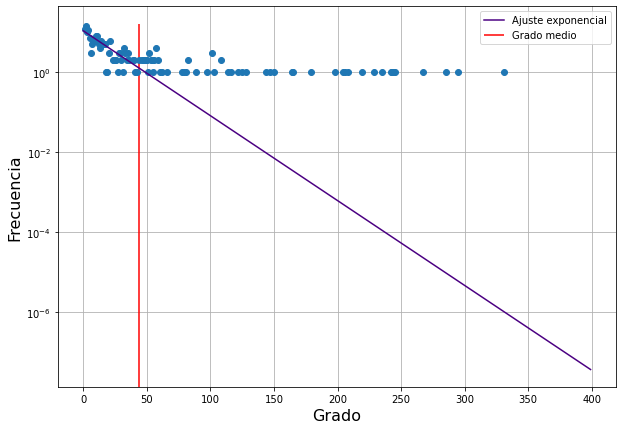

In [97]:

plt.figure(figsize = (10,7))
plt.semilogy(x_te, y_te, 'o')
plt.semilogy(expo(xspace,popt1te[0], popt1te[1]), color = 'indigo', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_textiles), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [101]:
y_array_te = np.asarray(y_te)/sum(y_te)
popt2te, pcov2te = curve_fit(expo, xdata = x_te, ydata = y_array_te)
y_newman_te = newman(y_array_te)

popt3te, pocv3te = curve_fit(expo, xdata = x_te, ydata = y_newman_te)


<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


In [45]:
entropy(y_array_te)

4.153916419298767

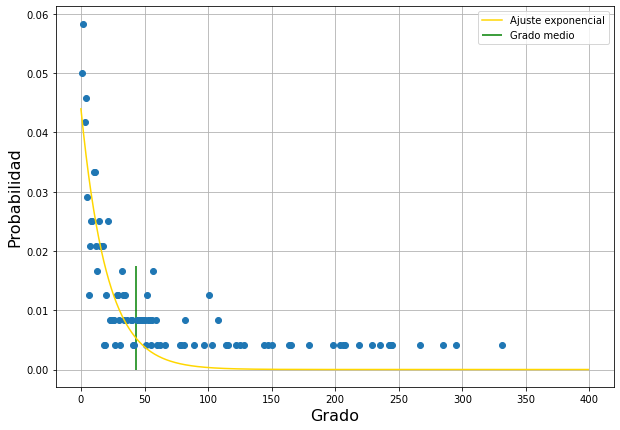

In [99]:
plt.figure(figsize = (10,7))
plt.plot(x_te, y_array_te, 'o')
plt.plot(expo(xspace,popt2te[0], popt2te[1]), color = 'gold', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_textiles), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
plt.legend()
plt.grid()
plt.show()

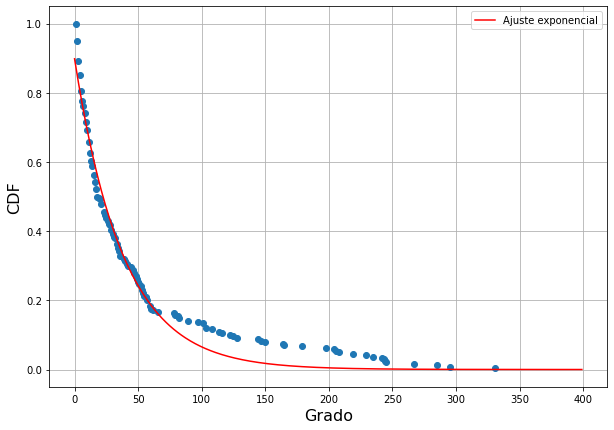

In [102]:
plt.figure(figsize = (10,7))
plt.plot(x_te, y_newman_te, 'o')
plt.plot(expo(xspace,popt3te[0], popt3te[1]), color = 'r', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()
plt.show()


In [103]:
# Calculo del R^2 para ambos casos 
print(r_squared(x_te, y_te, popt1))
print(r_squared(x_te, y_array_te, popt2tx))
print(r_squared(x_te, y_newman_te, popt3tx)) #distribuvion cumulativa


0.6328775640185172
0.6910038059428596
0.9731221647663458


In [104]:


print(entropy(y_array_te))
print(entropy(y_newman_te))



4.153916419298767
23.83999198233976


Bueeenoo, la distribución de grado es exponencial
la entroía aumenta casi 6 veces

In [124]:
# Zonas con mayor grado 
degree_dict = dict(Grafo_no_textiles.degree())
sorted_d = dict( sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True))
dict_degree = dict(itertools.islice(sorted_d.items(), 10))
dict_degree

{'EU-28': 192,
 'Netherlands': 173,
 'Germany': 172,
 'United States of America': 155,
 'Spain': 154,
 'Poland': 153,
 'United Kingdom': 152,
 'Italy': 152,
 'ASEAN': 149,
 'Belgium': 144}

### Vehiculos

In [107]:
xx_ve, yx_ve = degree_dist(Grafo_dirigido_vehiculo)
xx_ve = np.asarray(xx_ve)
yx_ve = np.asarray(yx_ve)
popt1ve, pcov1ve = curve_fit(expo, xdata = xx_ve, ydata = yx_ve)
xspace = np.linspace(0,260, num = 300)

<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


In [108]:
y_arrayx_ve = np.asarray(yx_ve)/sum(yx_ve)
popt2ve, pcov2ve = curve_fit(expo, xdata = xx_ve, ydata = y_arrayx_ve)
y_newmanx_ve = newman(y_arrayx_ve)

popt3ve, pocv3ve = curve_fit(expo, xdata = xx_ve, ydata = y_newmanx_ve)

<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


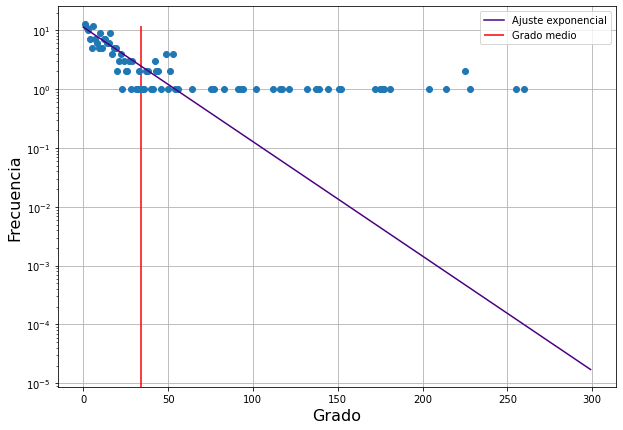

In [109]:
plt.figure(figsize = (10,7))
plt.semilogy(xx_ve, yx_ve, 'o')
plt.semilogy(expo(xspace,popt1ve[0], popt1ve[1]), color = 'indigo', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_vehiculo), 0, 12, color = 'r',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.legend()
plt.grid()
plt.show()

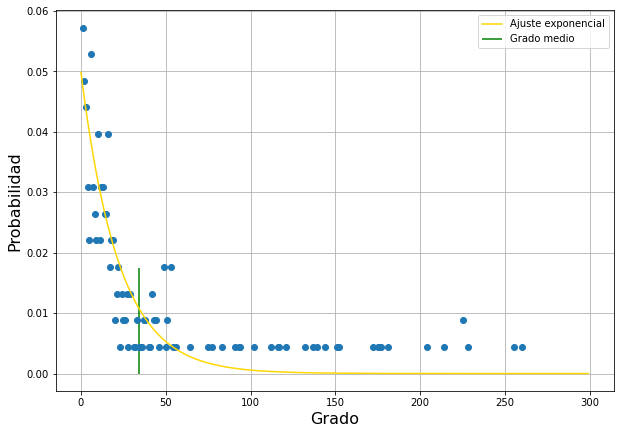

In [110]:
plt.figure(figsize = (10,7))
plt.plot(xx_ve, y_arrayx_ve, 'o')
plt.plot(expo(xspace,popt2ve[0], popt2ve[1]), color = 'gold', label = 'Ajuste exponencial')
plt.vlines(mean_degree(Grafo_dirigido_vehiculo), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
plt.legend()
plt.grid()
plt.show()


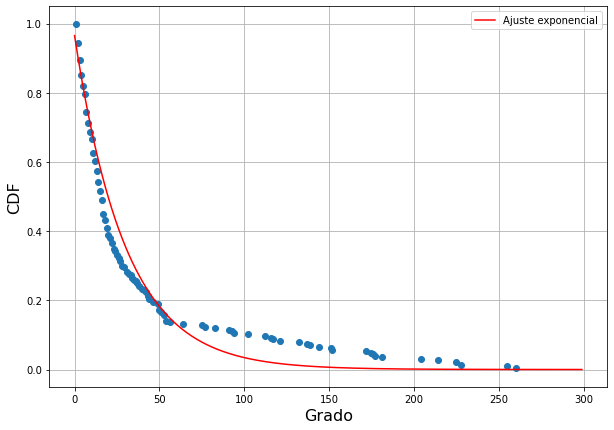

In [111]:
plt.figure(figsize = (10,7))
plt.plot(xx_ve, y_newmanx_ve, 'o')
plt.plot(expo(xspace,popt3ve[0], popt3ve[1]), color = 'r', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 0.0175, color = 'g',label = 'Grado medio')
plt.xlabel('Grado', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()
plt.show()


In [112]:
# Calculo del R^2 para ambos casos 
print(r_squared(xx_ve, yx_ve, popt1ve))
print(r_squared(xx_ve, y_arrayx_ve, popt2ve))
print(r_squared(xx_ve, y_newmanx_ve, popt3ve)) #distribuvion cumulativa



0.7689511089584179
0.7689511090214961
0.9677741753612074


estas tienen cada vez más pinta de funciones exponenciales

In [122]:
print(entropy(y_arrayx_ve))
print(entropy(y_newmanx_ve))



2*Grafo_no_vehiculo.number_of_edges()/len(Grafo_dirigido_vehiculo)


3.964104630182387
19.919399016537056


25.444933920704845

Vea como cambia la entropía, la entropía de la distrución de grado es 3.96, mientras la d ela distribución acumulativa es de asi 20, se multiplica por 5. También el grado medio es 34, que es bajo.

In [123]:
# Zonas con mayor grado 
degree_dict = dict(Grafo_no_vehiculo.degree())
sorted_d = dict( sorted(degree_dict.items(), key=operator.itemgetter(1),reverse=True))
dict_degree = dict(itertools.islice(sorted_d.items(), 10))
dict_degree

{'Germany': 178,
 'EU-28': 172,
 'United States of America': 155,
 'Netherlands': 152,
 'United Kingdom': 151,
 'ASEAN': 139,
 'Japan': 138,
 'Spain': 133,
 'Belgium': 126,
 'Canada': 126}

## Ahoraaaa, elegimos la medida de grdo de entrada y de salida xd

recordando
TOTALES:Grafo_dirigido_totales
MATERIAGrafo_dirigido_materia
VEHICULO:Grado_dirigido_vehiculos
TEXTILES: Grafo_dirigido_txtiles

Usaremos nuestro grado dirigido yei

### Totales

In [135]:
x_in_totales, y_in_totales, x_out_totales, y_out_totales = in_out_degree(Grafo_dirigido_totales)
y_in_totales = np.asarray(y_in_totales)/sum(y_in_totales)
y_out_totales = np.asarray(y_out_totales)/sum(y_out_totales)
y_in_n_totales = newman(y_in_totales)
y_out_n_totales = newman(y_out_totales)
popt_in_totales, pocv_in_totales = curve_fit(expo, xdata = x_in_totales, ydata = y_in_n_totales)
popt_out_totales, pocv_out_totales = curve_fit(expo, xdata = x_out_totales, ydata = y_out_n_totales)
x_space = np.linspace(0, 350, num = 350)


<ipython-input-21-1f1b6d402b92>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x1)


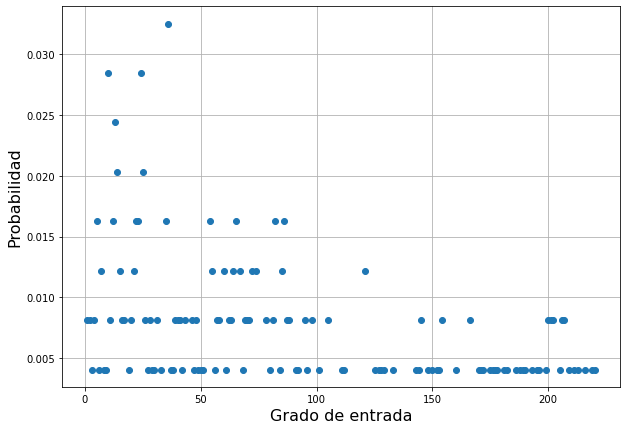

In [136]:
plt.figure(figsize = (10,7))
plt.plot(x_in_totales, y_in_totales, 'o')
#plt.plot(x_out, y_out, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
#plt.legend()
plt.grid()
plt.show()

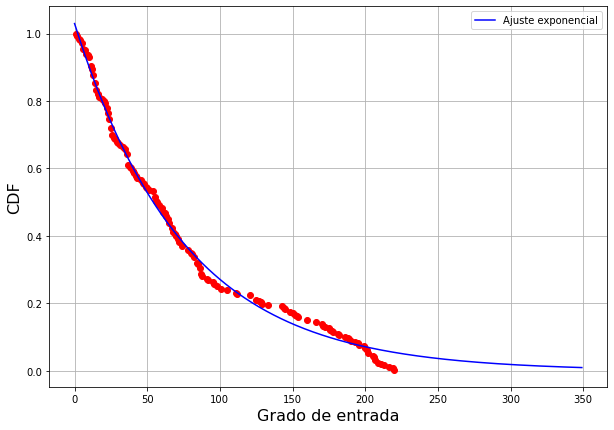

In [137]:
plt.figure(figsize = (10,7))
plt.plot(x_in_totales, y_in_n_totales, 'o', color = 'r')
plt.plot(expo(x_space,popt_in_totales[0], popt_in_totales[1]), color = 'b', label = 'Ajuste exponencial')
#plt.plot(x_out, y_out_n, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()



Buenoo esto se parece a una ley exponencial, entonces vamos a hacerlo con el grado de salida

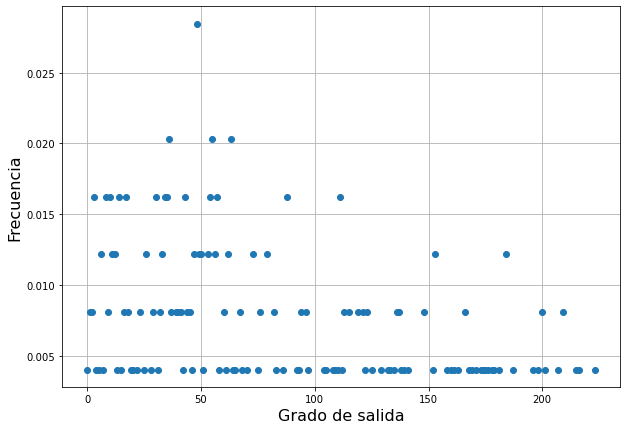

In [138]:
plt.figure(figsize = (10,7))
plt.plot(x_out_totales, y_out_totales, 'o')
#plt.plot(x_out_totales, y_out_totales, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
#plt.legend()
plt.grid()
plt.show()


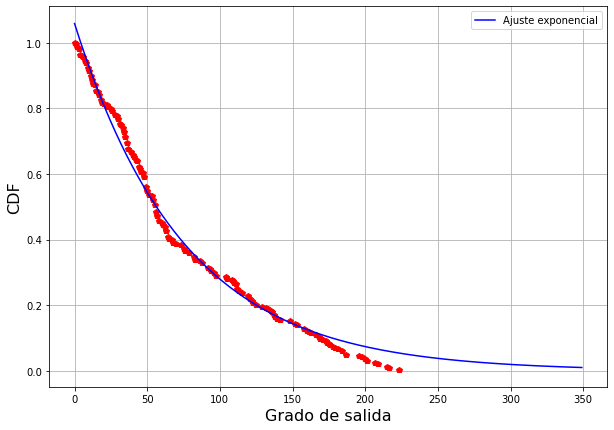

In [139]:
plt.figure(figsize = (10,7))
#plt.plot(x_in_totales, y_in_n, 'o', color = 'r')
plt.plot(x_out_totales, y_out_n_totales, 'p', color = 'r')
plt.plot(expo(x_space,popt_out_totales[0], popt_out_totales[1]), color = 'b', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()

In [140]:
x_in_totales = np.asarray(x_in_totales)
x_out_totales = np.asarray(x_out_totales)
print(r_squared(x_in_totales, y_in_n_totales, popt_in_totales))
print(r_squared(x_out_totales, y_out_n_totales, popt_out_totales))


0.9949963112278665
0.9915494705460636


Estos son super obvios  que son leyes de potencia

In [141]:
print(entropy(y_in_totales))
print(entropy(y_out_totales))
print(entropy(y_in_n_totales))
print(entropy(y_out_n_totales))


4.6534486147582035
4.683124524985551
32.217665737675325
31.538274379326236


Esto tiene comportamientos similares

### Materia 

In [147]:
x_in_materia, y_in_materia, x_out_materia, y_out_materia = in_out_degree(Grafo_dirigido_materias)
y_in_materia = np.asarray(y_in_materia)/sum(y_in_materia)
y_out_materia = np.asarray(y_out_materia)/sum(y_out_materia)
y_in_n_materia = newman(y_in_materia)
y_out_n_materia = newman(y_out_materia)
popt_in_materia, pocv_in_materia = curve_fit(expo, xdata = x_in_materia, ydata = y_in_n_materia)
popt_out_materia, pocv_out_materia = curve_fit(expo, xdata = x_out_materia, ydata = y_out_n_materia)
x_space = np.linspace(0, 350, num = 350)


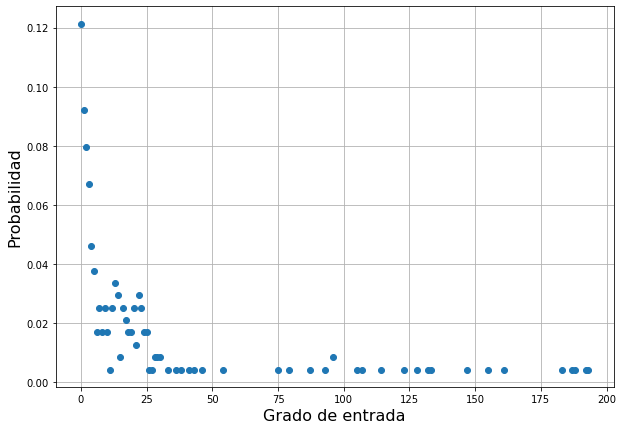

In [148]:
plt.figure(figsize = (10,7))
plt.plot(x_in_materia, y_in_materia, 'o')
#plt.plot(x_out_materia, y_out_materia, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
#plt.legend()
plt.grid()
plt.show()

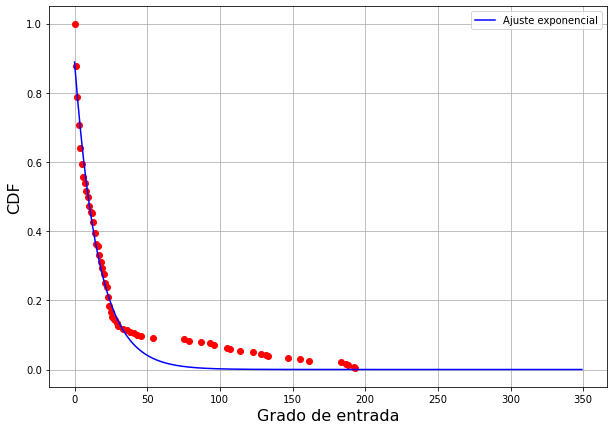

In [149]:
plt.figure(figsize = (10,7))
plt.plot(x_in_materia, y_in_n_materia, 'o', color = 'r')
plt.plot(expo(x_space,popt_in_materia[0], popt_in_materia[1]), color = 'b', label = 'Ajuste exponencial')
#plt.plot(x_out_materia, y_out_n, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# Ahora veremos el grado de salida

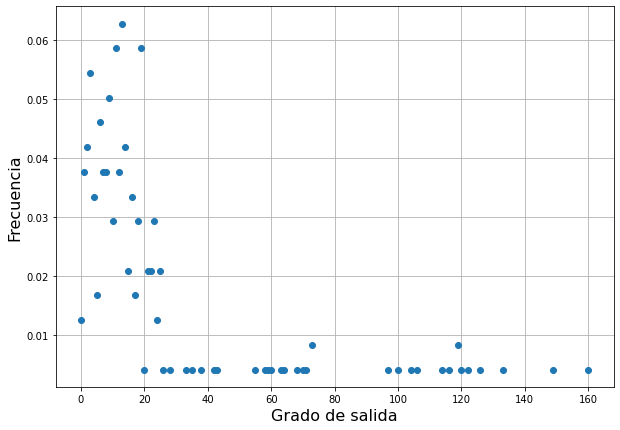

In [150]:
plt.figure(figsize = (10,7))
plt.plot(x_out_materia, y_out_materia, 'o')
#plt.plot(x_out_materia, y_out_materia, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
#plt.legend()
plt.grid()
plt.show()

esta miercoles k es 

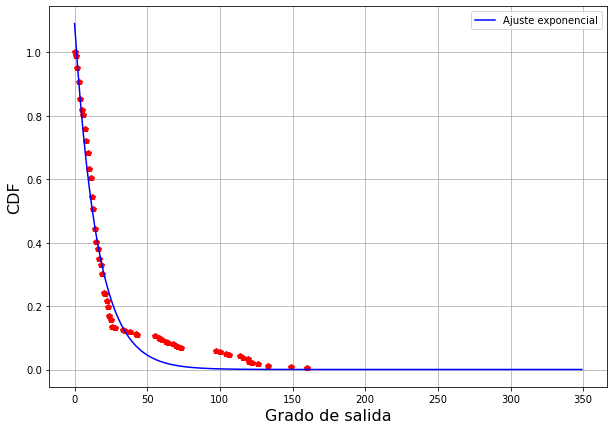

In [151]:
plt.figure(figsize = (10,7))
#plt.plot(x_in_materia, y_in_n, 'o', color = 'r')
plt.plot(x_out_materia, y_out_n_materia, 'p', color = 'r')
plt.plot(expo(x_space,popt_out_materia[0], popt_out_materia[1]), color = 'b', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()


In [152]:
x_in_materia = np.asarray(x_in_materia)
x_out_materia = np.asarray(x_out_materia)
print(r_squared(x_in_materia, y_in_n_materia, popt_in_materia))
print(r_squared(x_out_materia, y_out_n_materia, popt_out_materia))


0.9723509793668198
0.9748027783426266


In [153]:
print(entropy(y_in_materia))
print(entropy(y_out_materia))
print(entropy(y_in_n_materia))
print(entropy(y_out_n_materia))


3.4782020537814993
3.568577494509282
13.751386948360322
11.950529114594833


La entropia del grado de entrada es similar para totales, pero la del coso de newmann no cambia atnto

### Vehiculo 

In [154]:
x_in_vehiculo, y_in_vehiculo, x_out_vehiculo, y_out_vehiculo = in_out_degree(Grafo_dirigido_vehiculo)
y_in_vehiculo = np.asarray(y_in_vehiculo)/sum(y_in_vehiculo)
y_out_vehiculo = np.asarray(y_out_vehiculo)/sum(y_out_vehiculo)
y_in_n_vehiculo = newman(y_in_vehiculo)
y_out_n_vehiculo = newman(y_out_vehiculo)
popt_in_vehiculo, pocv_in_vehiculo = curve_fit(expo, xdata = x_in_vehiculo, ydata = y_in_n_vehiculo)
popt_out_vehiculo, pocv_out_vehiculo = curve_fit(expo, xdata = x_out_vehiculo, ydata = y_out_n_vehiculo)
x_space = np.linspace(0, 350, num = 350)

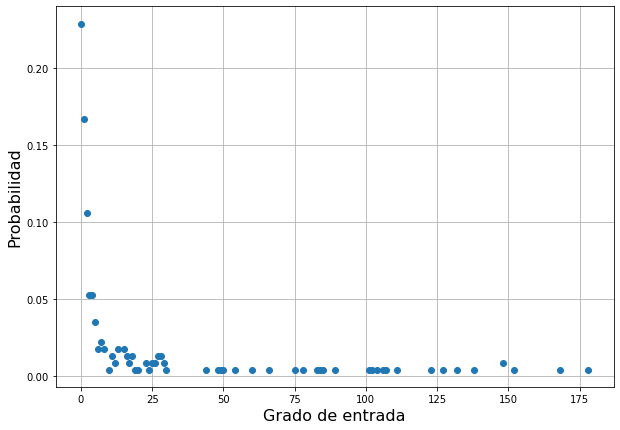

In [155]:
plt.figure(figsize = (10,7))
plt.plot(x_in_vehiculo, y_in_vehiculo, 'o')
#plt.plot(x_out_vehiculo, y_out_vehiculo, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
#plt.legend()
plt.grid()
plt.show()


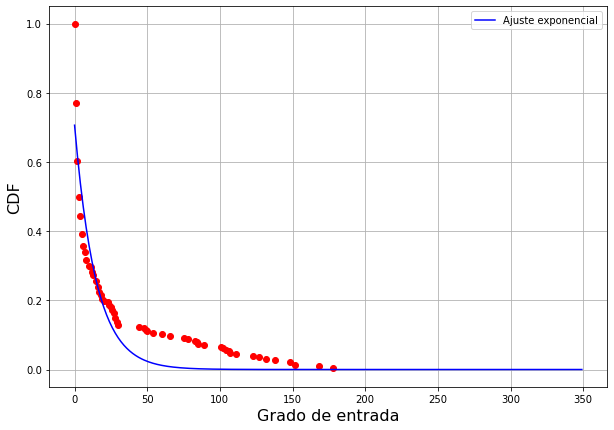

In [156]:
plt.figure(figsize = (10,7))
plt.plot(x_in_vehiculo, y_in_n_vehiculo, 'o', color = 'r')
plt.plot(expo(x_space,popt_in_vehiculo[0], popt_in_vehiculo[1]), color = 'b', label = 'Ajuste exponencial')
#plt.plot(x_out_vehiculo, y_out_n, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()


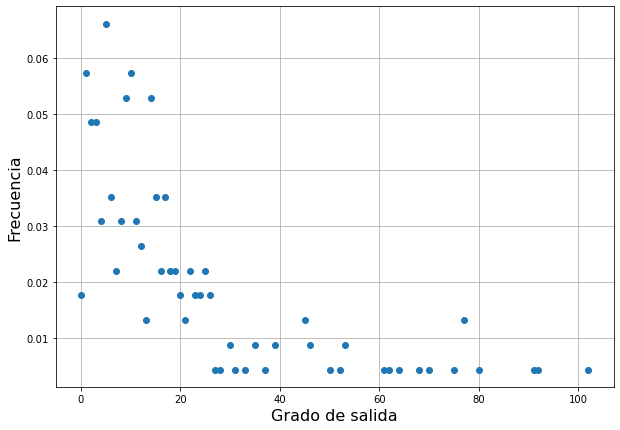

In [157]:
plt.figure(figsize = (10,7))
plt.plot(x_out_vehiculo, y_out_vehiculo, 'o')
#plt.plot(x_out_vehiculo, y_out_vehiculo, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
#plt.legend()
plt.grid()
plt.show()

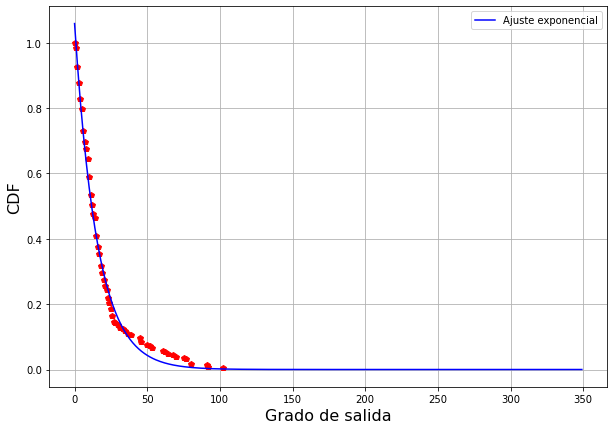

In [158]:
plt.figure(figsize = (10,7))
#plt.plot(x_in_vehiculo, y_in_n, 'o', color = 'r')
plt.plot(x_out_vehiculo, y_out_n_vehiculo, 'p', color = 'r')
plt.plot(expo(x_space,popt_out_vehiculo[0], popt_out_vehiculo[1]), color = 'b', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()


In [159]:
x_in_vehiculo = np.asarray(x_in_vehiculo)
x_out_vehiculo = np.asarray(x_out_vehiculo)
print(r_squared(x_in_vehiculo, y_in_n_vehiculo, popt_in_vehiculo))
print(r_squared(x_out_vehiculo, y_out_n_vehiculo, popt_out_vehiculo))

0.8470319407343713
0.9926240418657202


Oiga el grado de entrada no está chevere , el de salida s se ve melo

In [160]:
print(entropy(y_in_vehiculo))
print(entropy(y_out_vehiculo))
print(entropy(y_in_n_vehiculo))
print(entropy(y_out_n_vehiculo))


2.990365543955022
3.5864213711470705
13.001938145296561
11.639491694992508


### Textiles 

In [161]:
x_in_textiles, y_in_textiles, x_out_textiles, y_out_textiles = in_out_degree(Grafo_dirigido_textiles)
y_in_textiles = np.asarray(y_in_textiles)/sum(y_in_textiles)
y_out_textiles = np.asarray(y_out_textiles)/sum(y_out_textiles)
y_in_n_textiles = newman(y_in_textiles)
y_out_n_textiles = newman(y_out_textiles)
popt_in_textiles, pocv_in_textiles = curve_fit(expo, xdata = x_in_textiles, ydata = y_in_n_textiles)
popt_out_textiles, pocv_out_textiles = curve_fit(expo, xdata = x_out_textiles, ydata = y_out_n_textiles)
x_space = np.linspace(0, 350, num = 350)


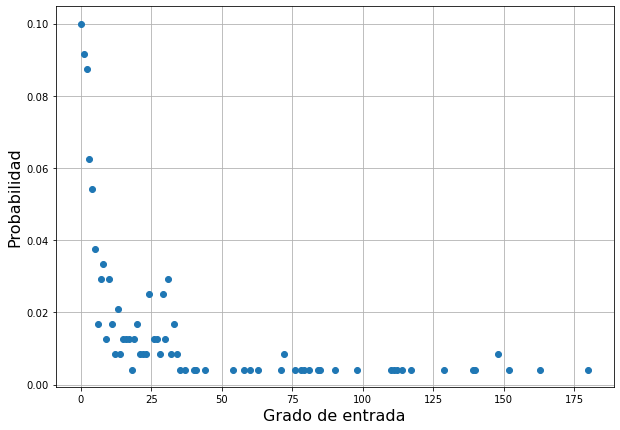

In [162]:
plt.figure(figsize = (10,7))
plt.plot(x_in_textiles, y_in_textiles, 'o')
#plt.plot(x_out_textiles, y_out_textiles, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('Probabilidad', fontsize=16)
#plt.legend()
plt.grid()
plt.show()


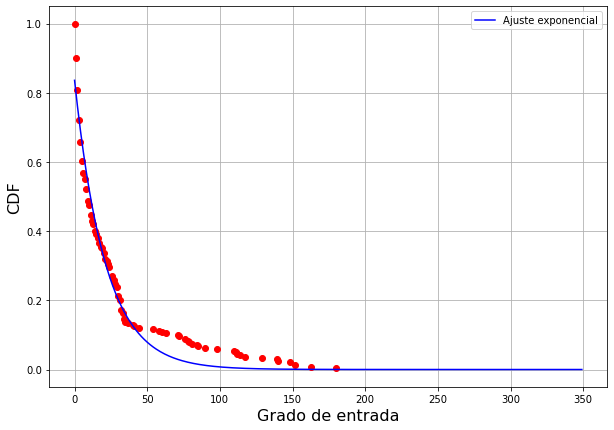

In [163]:
plt.figure(figsize = (10,7))
plt.plot(x_in_textiles, y_in_n_textiles, 'o', color = 'r')
plt.plot(expo(x_space,popt_in_textiles[0], popt_in_textiles[1]), color = 'b', label = 'Ajuste exponencial')
#plt.plot(x_out_textiles, y_out_n, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de entrada', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()

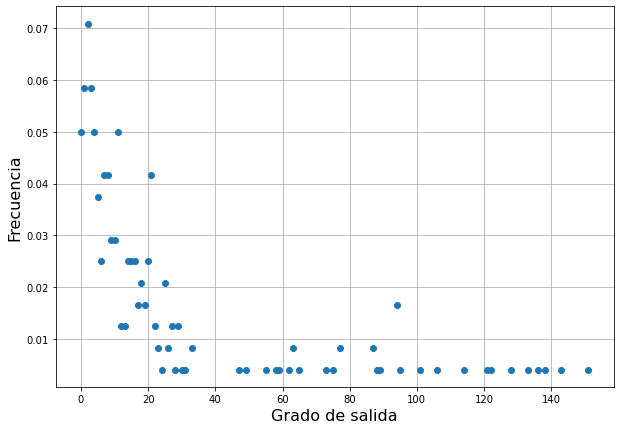

In [164]:
plt.figure(figsize = (10,7))
plt.plot(x_out_textiles, y_out_textiles, 'o')
#plt.plot(x_out_textiles, y_out_textiles, 'p')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
#plt.legend()
plt.grid()
plt.show()

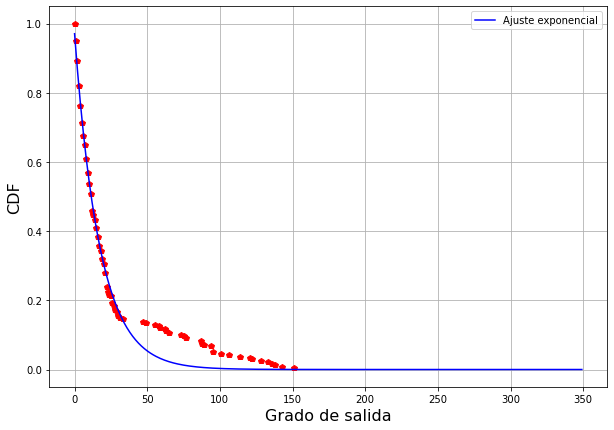

In [165]:
plt.figure(figsize = (10,7))
#plt.plot(x_in_textiles, y_in_n, 'o', color = 'r')
plt.plot(x_out_textiles, y_out_n_textiles, 'p', color = 'r')
plt.plot(expo(x_space,popt_out_textiles[0], popt_out_textiles[1]), color = 'b', label = 'Ajuste exponencial')
#plt.vlines(mean_degree(und_unw_graph), 0, 16, color = 'r',label = 'Grado medio')
plt.xlabel('Grado de salida', fontsize=16)
plt.ylabel('CDF', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [166]:
x_in_textiles = np.asarray(x_in_textiles)
x_out_textiles = np.asarray(x_out_textiles)
print(r_squared(x_in_textiles, y_in_n_textiles, popt_in_textiles))
print(r_squared(x_out_textiles, y_out_n_textiles, popt_out_textiles))


0.9616015774865283
0.9716477647181233


estas están mejores

In [167]:
print(entropy(y_in_textiles))
print(entropy(y_out_textiles))
print(entropy(y_in_n_textiles))
print(entropy(y_out_n_textiles))


3.5997655486434716
3.651931283448093
16.28703087554358
14.27710432256281


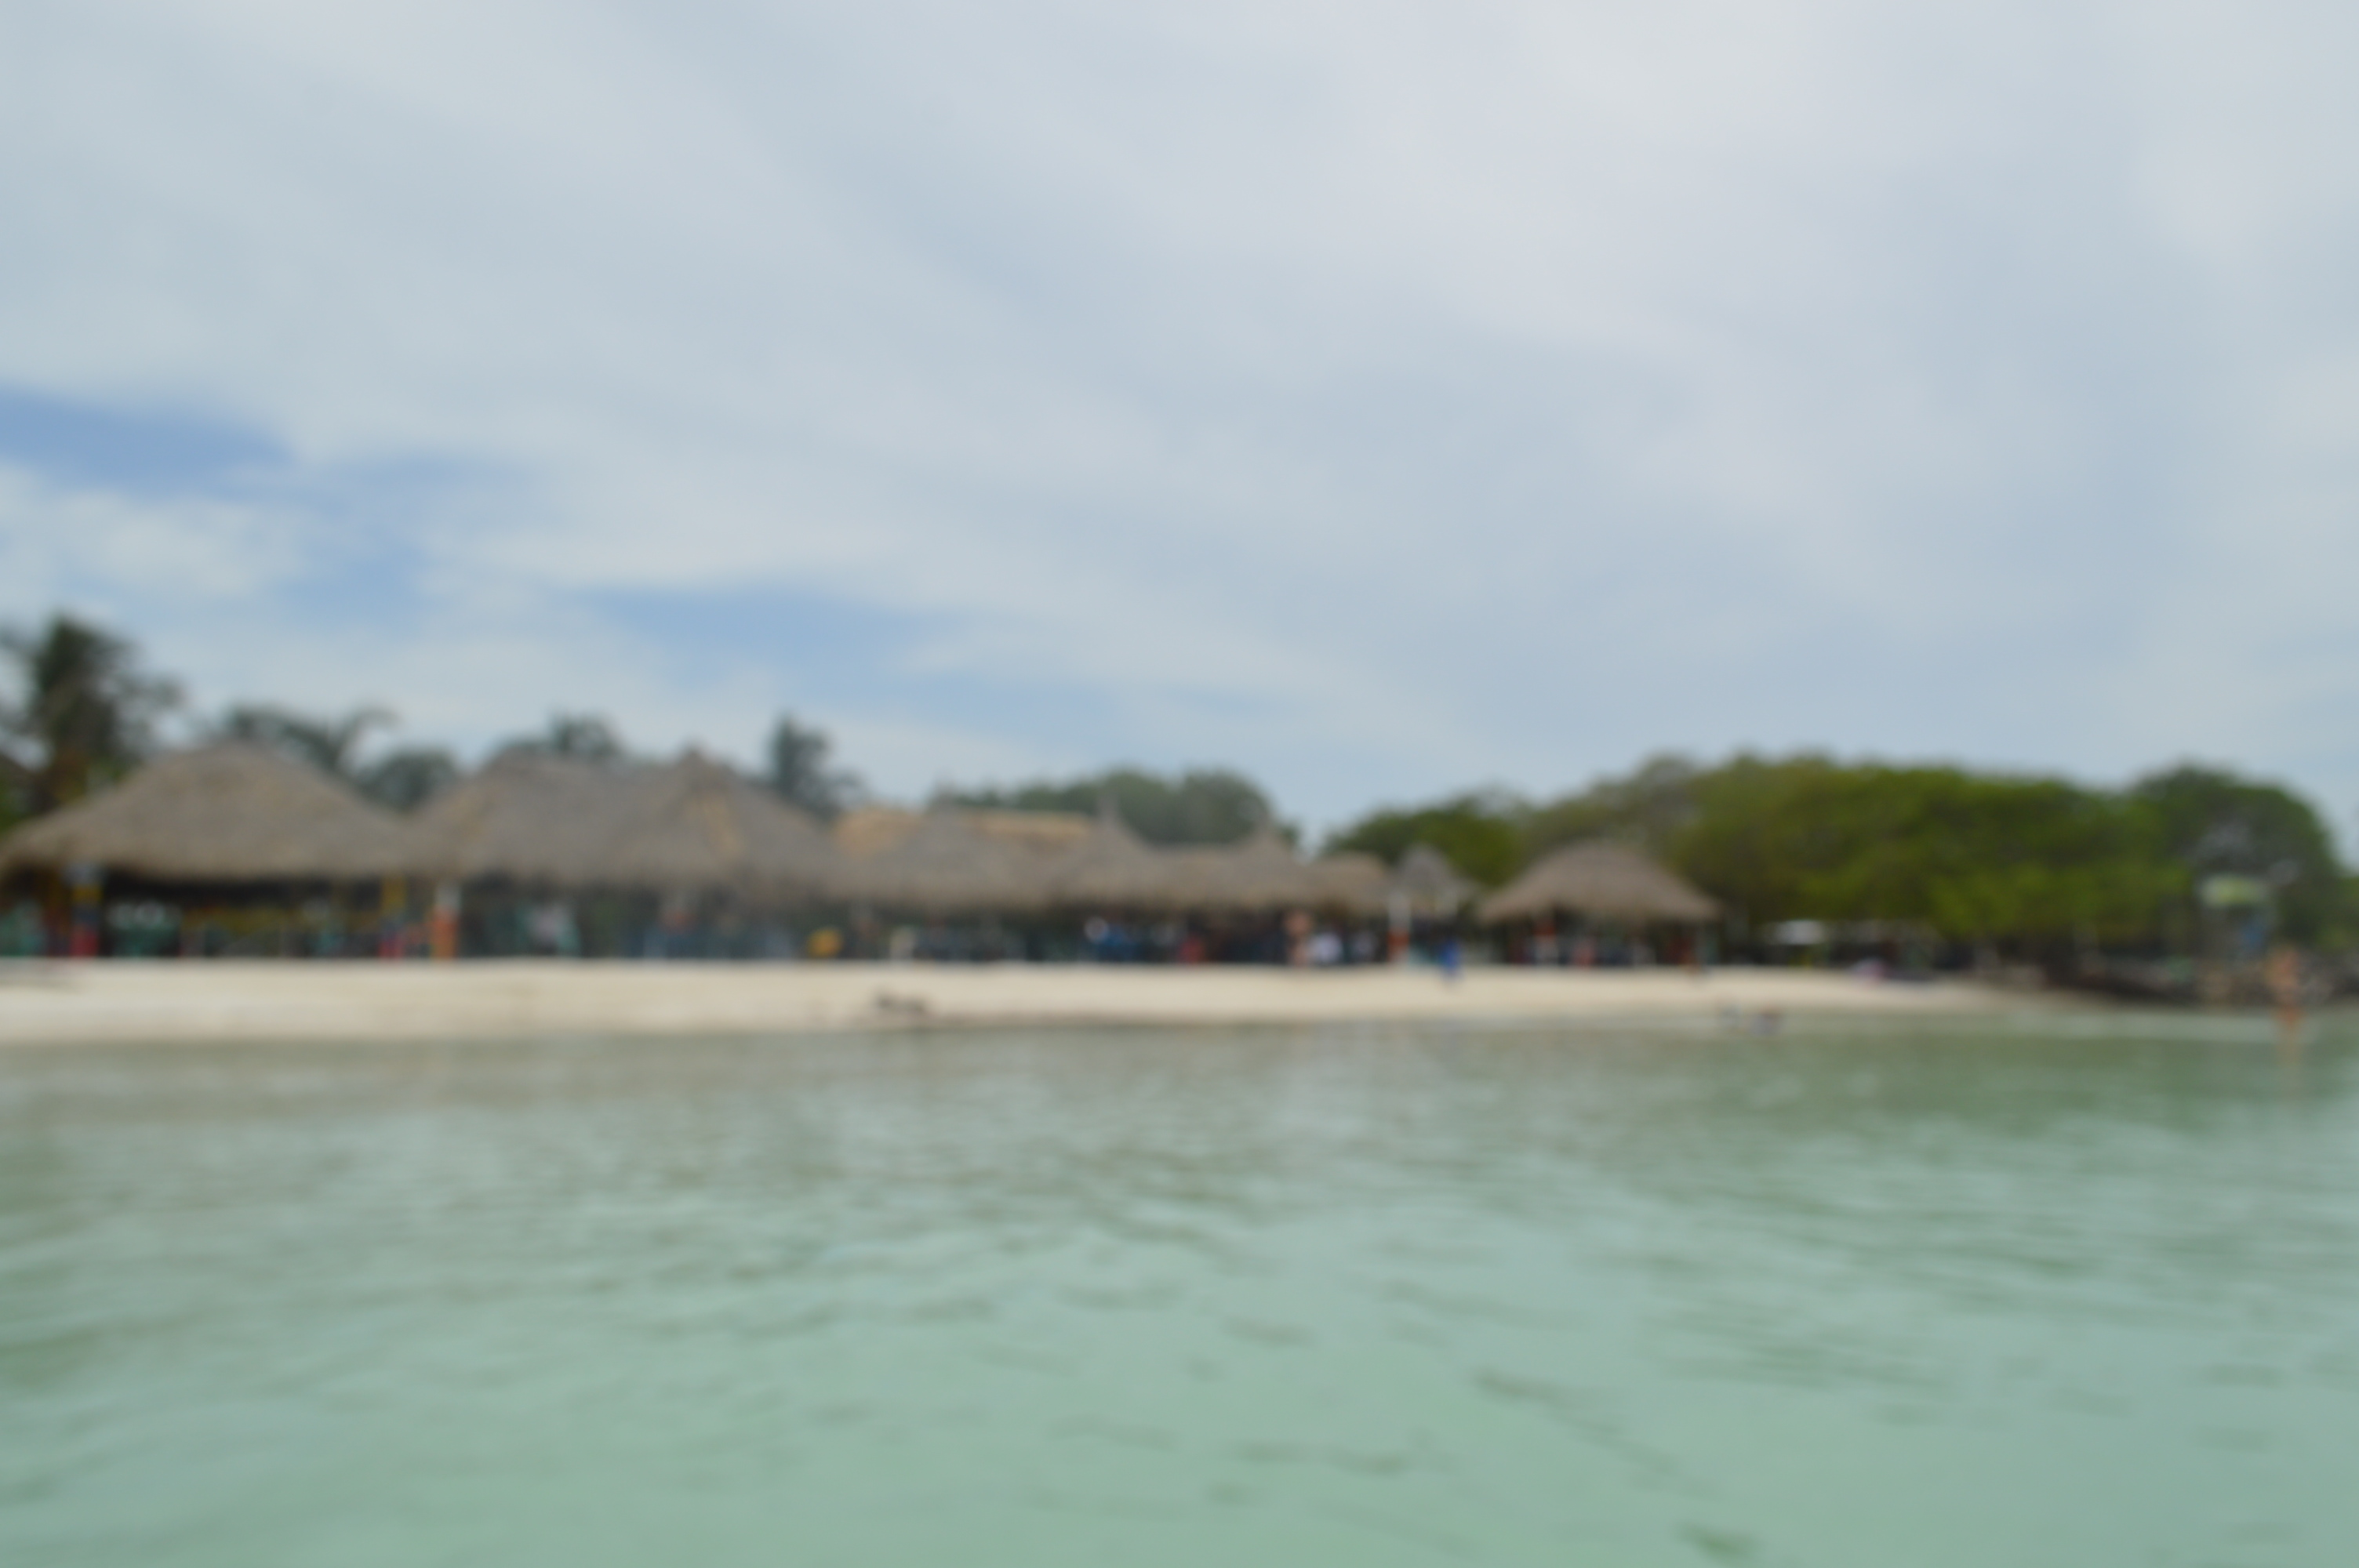

Fuerza nodal

In [170]:
raw_data_materia = pd.read_table('2020abril_adjacency_materia.csv',sep=',',encoding='utf-8')
raw_data_textiles = pd.read_table('2020abril_adjacency_textiles.csv',sep=',',encoding='utf-8')
raw_data_vehiculo = pd.read_table('2020abril_adjacency_vehiculos.csv',sep=',',encoding='utf-8')
raw_data_totales = pd.read_table('2020abril_adjency.csv',sep=',',encoding='utf-8')

In [175]:
df_totales=pd.DataFrame
peso_in_totales=raw_data_totales.sum(axis=0)
pesoin_series_totales=pd.Series(peso_in_totales)

x_=raw_data_totales.sum(axis=1)
#c=x_.type()
#print(c)
peso_out_totales=raw_data_totales.sum()


data_totales = {"w_in": peso_in_totales, 
        "w_ot": peso_out_totales} 
  
df_totales = pd.concat(data_totales, axis = 1) 
pesos_in_totales_lista=df_totales['w_in'].tolist()
pesos_in_totales_lista.pop(0)

TypeError: 'type' object is not subscriptable

In [198]:
df_totales=pd.DataFrame
peso_in_totales=raw_data_totales.sum(axis=0)
pesoin_series_totales=pd.Series(peso_in_totales)

x_=raw_data_totales.sum(axis=1)
#c=x_.type()
#print(c)
peso_out_totales=raw_data_totales.sum()


data_totales = {"w_in": peso_in_totales, 
        "w_ot": peso_out_totales} 
  
df_totales = pd.concat(data_totales, axis = 1) 
pesos_in_totales_lista=df_totales['w_in'].tolist()
pesos_in_totales_lista.pop(0)

"UgandaSpainRep. of KoreaIndiaItalyGreeceIranCubaChinaGambiaAustraliaBelgiumJapanSaint Vincent and the GrenadinesSouth AfricaRwandaTurkeyDem.Rep. of the CongoNigerPapua New GuineaThailandRussian FederationBurundiFranceQatarUkraineEgyptRomaniaKenyaHungaryIndonesiaIrelandFinlandBotswanaNigeriaNorwayMoroccoLithuaniaSenegalLebanonUnited Arab EmiratesMyanmarBelarusDenmarkPolandNamibiaBurkina FasoWorldAngolaKuwaitMaliOther Asia, nesNetherlandsSwitzerlandSloveniaTurks and Caicos IsdsSwazilandNew ZealandPortugalCroatiaEthiopiaAlgeriaCanadaUnited States of AmericaUnited KingdomChileAustriaBangladeshBahrainGermanyOmanDem. People's Rep. of KoreaColombiaSingaporeMozambiqueViet NamZimbabweZambiaGhanaSaudi ArabiaMalawiMalaysiaJordanIcelandLatviaLuxembourgSouth SudanSwedenPhilippinesJamaicaChina, Hong Kong SARBrazilBulgariaSri LankaCameroonCzech Rep.BeninCôte d'IvoireIsraelSierra LeoneMexicoPakistanUnited Rep. of TanzaniaDjiboutiArgentinaSerbiaMauritiusSlovakiaOther Europe, nesAreas, nesNorth America

In [178]:
df_totales=pd.DataFrame
peso_out_totales=np.asarray(raw_data_totales.sum(axis=1))
pesoin_series_totales=pd.Series(peso_in_totales)

x_totales=np.asarray(raw_data_totales.sum())
x_totales=x_totales[1:]
Fortaleza_in_totales=x_totales.astype(np.float)

In [199]:
w_array_totales = list(Grafo_dirigido_totales.edges(data = True)) 

In [200]:
#funcion que saca la fortaleza de salida cada nodo 
array_totales = []
for i in w_array_totales:
    count = 0
    for j in w_array_totales:
        if j[0] == i[0]:
            for k in j[2].values():
                count = count +k
    array_totales.append((count, i[0]))
array_totales = list(set(array_totales))


In [201]:
str_out_totales = nodal_strength(w_array_totales, 1)
str_in_totales = nodal_strength(w_array_totales, 0)

In [185]:
w_array1_und_totales = list(Grafo_no_totales.edges(data = True))

In [186]:
strength_totales = nodal_strength(w_array1_und_totales, 1)+nodal_strength(w_array1_und_totales, 0)
strength_totales.sort(reverse = True)


In [202]:
def extract(array):
    my_array = []
    for i in array:
        my_array.append(i[0])
    return np.asarray(my_array)
array_str_totales = extract(strength_totales)
array_in_totales  = extract(str_in_totales)
array_out_totales = extract(str_out_totales)

# Se sacan las distribuciones 
str_x_totales, str_y_totales= count(array_str_totales)
str_mean_totales = np.mean(array_str_totales) 
in_x_totales, in_y_totales = count(np.asarray(str_in_totales))
out_x_totales, out_y_totales = count (np.asarray(str_out_totales))

TypeError: 'float' object is not callable

In [204]:
str_x_totales = np.asarray([list(array_str_totales).count(x) for x in np.unique(array_str_totales)])
str_y_totales = np.asarray([x for x in np.unique(array_str_totales)])
str_mean_totales = np.mean(array_str_totales) 
in_y_totales = np.asarray([list(array_in_totales).count(x) for x in np.unique(array_in_totales)])
in_x_totales = np.asarray([x for x in np.unique(array_in_totales)])
in_mean_totales = np.mean(array_in_totales)
out_y_totales = np.asarray([list(array_out_totales).count(x) for x in np.unique(array_out_totales)])
out_x_totales = np.asarray([x for x in np.unique(array_out_totales)])
out_mean_totales = np.mean(array_out_totales)

In [211]:
dios=Fortaleza_in_totales[1:]

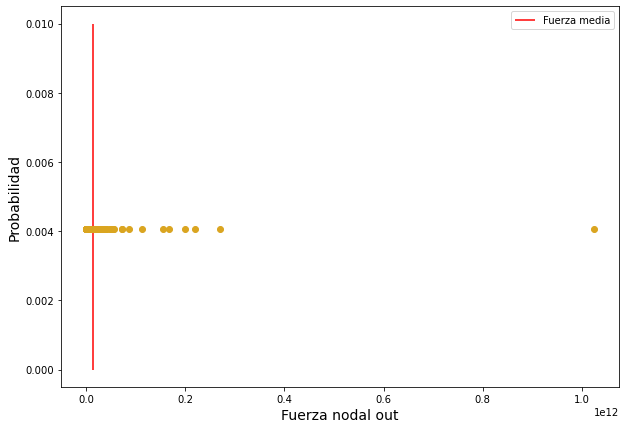

In [206]:
plt.figure(figsize = (10,7))
plt.plot(out_x_totales, out_y_totales/sum(out_y_totales), 'o', color = 'goldenrod')
plt.vlines(in_mean_totales, 0, 0.01, color = 'r',label = 'Fuerza media')
plt.xlabel('Fuerza nodal out', fontsize = 14)
plt.ylabel('Probabilidad', fontsize = 14)
plt.legend()



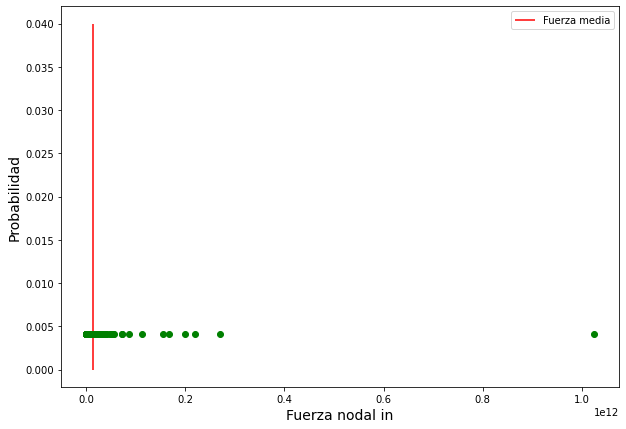

In [212]:
plt.figure(figsize = (10,7))
plt.plot(dios, in_y_totales/sum(in_y_totales), 'o', color = 'g')
plt.vlines(in_mean_totales, 0, 0.04, color = 'r',label = 'Fuerza media')
plt.xlabel('Fuerza nodal in', fontsize = 14)
plt.ylabel('Probabilidad', fontsize = 14)
plt.legend()


In [208]:
print(entropy(in_y_totales/sum(in_y_totales)))
print(entropy(out_y_totales/sum(out_y_totales)))

5.50125821054473
5.505331535932347
